In [1]:
 !pip install -q keras

In [2]:
import keras

Using TensorFlow backend.


In [3]:
import os 
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [4]:

dir = 'C:\\Users\\Nasik\\Desktop\\Semester 6\\FYP\\dataset-resized'

In [5]:
categories = ['cardboard','glass','metal','paper','plastic','trash']

In [6]:
data = [ ]

In [7]:
for category in categories:
    path = os.path.join(dir,category)
    label=categories.index(category)
    
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        trash_img = cv2.imread(imgpath,0)
        try:
            trash_img = cv2.resize(trash_img,(50,50))
            image=np.array(trash_img).flatten()
            data.append([image,label])
        except Exception as e:
            pass
print(len(data))    


2527


In [9]:
pick_in= open('data1.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()


In [10]:
pick_in= open('data1.pickle','rb')
data=pickle.load(pick_in)
pick_in.close()


In [8]:

random.shuffle(data)
features = []
labels=[]


In [9]:
for feature, label in data:
    features.append(feature)
    labels.append(label)


In [13]:
xtrain, xtest, ytrain,ytest = train_test_split (features, labels, train_size=0.80, test_size=0.20)


In [11]:
model= SVC(C=1,kernel='poly', gamma='auto')
model.fit(xtrain, ytrain)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
pick= open('model1.sav','wb')
pickle.dump(model,pick)
pick.close()


In [13]:
pick= open('model1.sav','rb')
model=pickle.load(pick)
pick.close()


Accuracy :  0.8616600790513834
Prediction is : paper


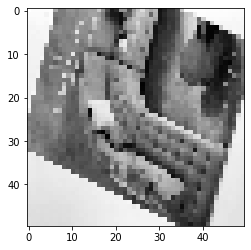

In [14]:
random.shuffle(data)
prediction= model.predict(xtest)
accuracy = model.score (xtest, ytest)

categories = ['cardboard','glass','metal','paper','plastic','trash']

print('Accuracy : ', accuracy)
print('Prediction is :',categories[prediction[0]])



trash=xtest[0].reshape(50,50)
plt.imshow(trash, cmap='gray')
plt.show()

  


In [16]:
from sklearn.model_selection import cross_val_score

cross_valid=cross_val_score(model,features,labels,cv=10,scoring='accuracy').mean()
print("Cross Validation : ",cross_valid)

Cross Validation :  0.3913592446201142


[[ 62   4   0   1   2   3]
 [  7  95   0   3   5   2]
 [  5   2  62   0   1   2]
 [  6   0   4 108   4   1]
 [  3   9   2   1  91   0]
 [  0   1   0   0   2  18]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        72
           1       0.86      0.85      0.85       112
           2       0.91      0.86      0.89        72
           3       0.96      0.88      0.92       123
           4       0.87      0.86      0.86       106
           5       0.69      0.86      0.77        21

    accuracy                           0.86       506
   macro avg       0.84      0.86      0.85       506
weighted avg       0.87      0.86      0.86       506

Cross Validation :  0.3913592446201142


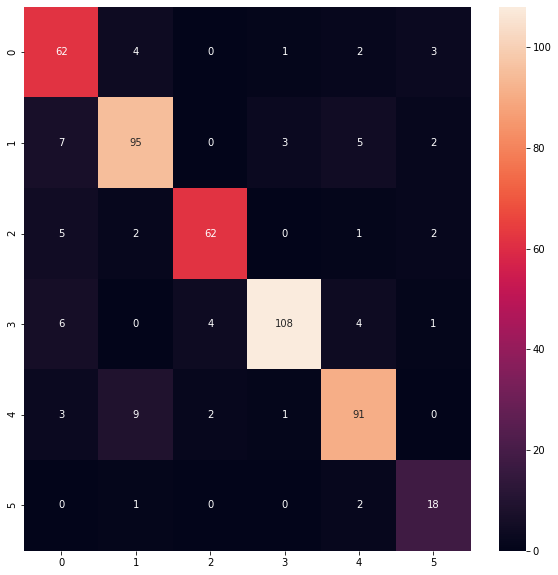

In [18]:




#CONFUSION MATRIX
import seaborn as sns
from sklearn.svm import SVC
predictions = model.predict(xtest)
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
print(confusion_matrix(ytest, predictions))
print(classification_report(ytest, predictions))
print("Cross Validation : ",cross_valid)
plt.figure(figsize=(10,10))
cm = confusion_matrix(ytest,predictions)
sns.heatmap(cm, annot=True, fmt="d")

In [17]:
#GRID SEARCH
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}
grid = GridSearchCV(SVC(),param_grid,verbose=2)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... C=0.1, gamma=1, total=  16.9s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.8s remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total=  16.8s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=  16.7s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=  17.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=  17.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=  17.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=  17.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=  17.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] ................................ C=10, gamma=0.001, total=  16.6s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  16.5s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  17.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  17.6s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  17.1s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  16.9s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=  16.8s
[CV] C=100, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 23.1min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [21]:

grid_predictions = grid.predict(xtest)
print(confusion_matrix(ytest,grid_predictions))
print(classification_report(ytest, grid_predictions))

[[  0   0   0  76   0   0]
 [  0   0   0  84   0   0]
 [  0   0   0  80   0   0]
 [  0   0   0 141   0   0]
 [  0   0   0 101   0   0]
 [  0   0   0  24   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        76
           1       0.00      0.00      0.00        84
           2       0.00      0.00      0.00        80
           3       0.28      1.00      0.44       141
           4       0.00      0.00      0.00       101
           5       0.00      0.00      0.00        24

    accuracy                           0.28       506
   macro avg       0.05      0.17      0.07       506
weighted avg       0.08      0.28      0.12       506



C:\Users\Nasik\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [240]:
grid.best_params_

{'C': 0.1, 'gamma': 1}

In [102]:
"""we can see that the results for precision, recall,f1-score,support,weighted avg
macro avg,accuracy all the results are exactly same for the before and after state
of the grid search. It took around 22 mins to execute the grid search."""

'we can see that the results for precision, recall,f1-score,support,weighted avg\nmacro avg,accuracy all the results are exactly same for the before and after state\nof the grid search. It took around 22 mins to execute the grid search.'

In [125]:
print (type(data))

<class 'list'>


In [ ]:
#result bad cause no model was built 

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
ytest = model.predict(xtest)


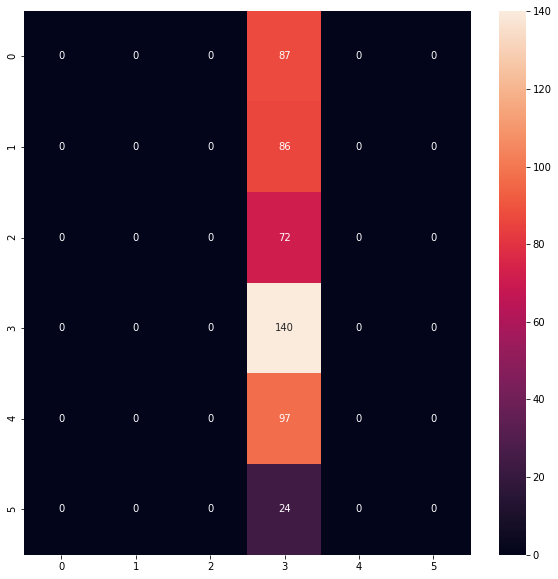

In [28]:
plt.figure(figsize=(10,10))
cm = confusion_matrix(ytest,grid_predictions)
sns.heatmap(cm, annot=True, fmt="d")

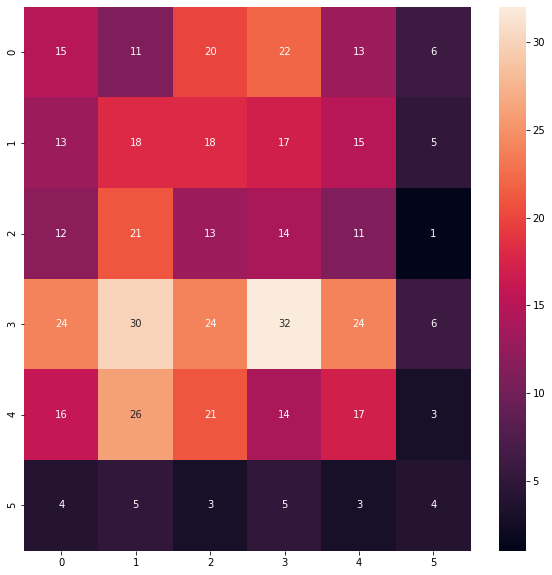

In [30]:
plt.figure(figsize=(10,10))
cm = confusion_matrix(ytest,prediction)
sns.heatmap(cm, annot=True, fmt="d")

In [19]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':['linear', 'rbf', 'poly'], 'C':[0.1, 0.5, 1, 5, 10]}

clf = GridSearchCV(SVC(), parameters)
clf.fit(xtrain, ytrain)
print('score',clf.score(xtest, ytest))
print(clf.best_params_)

score 0.5573122529644269
{'C': 1, 'kernel': 'rbf'}
Wall time: 20min 24s


In [177]:
"""   score 0.5375494071146245
{'C': 10, 'kernel': 'rbf'}
Wall time: 19min 43s   """

"   score 0.5375494071146245\n{'C': 10, 'kernel': 'rbf'}\nWall time: 19min 43s   "

In [23]:
xtrain, xtest, ytrain,ytest = train_test_split (features, labels, train_size=0.80, test_size=0.20)


In [21]:
model= SVC(C=1,kernel='rbf', gamma='auto')
model.fit(xtrain, ytrain)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [187]:
#passing the latest recommended attributes

In [188]:
pick= open('model5.sav','wb')
pickle.dump(model,pick)
pick.close()


In [196]:
pick= open('model5.sav','rb')
model=pickle.load(pick)
pick.close()

Cross Validation :  0.235060229625447
Accuracy :  0.8478260869565217
Prediction is : glass


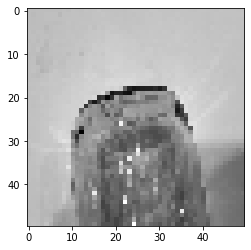

In [27]:
random.shuffle(data)
prediction= model.predict(xtest)
accuracy = model.score (xtest, ytest)

categories = ['cardboard','glass','metal','paper','plastic','trash']

from sklearn.model_selection import cross_val_score

cross_valid=cross_val_score(model,features,labels,cv=10,scoring='accuracy').mean()
print("Cross Validation : ",cross_valid)

print('Accuracy : ', accuracy)
print('Prediction is :',categories[prediction[0]])



trash=xtest[0].reshape(50,50)
plt.imshow(trash, cmap='gray')
plt.show()


  

In [29]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [198]:
#CONFUSION MATRIX
from sklearn.svm import SVC
predictions = model.predict(xtest)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(ytest, predictions))
print(classification_report(ytest, predictions))

[[ 56   0   0  16   0   0]
 [  0  89   0  21   0   0]
 [  0   0  65  16   0   0]
 [  0   0   0 112   0   0]
 [  0   1   0  16  79   0]
 [  0   0   0   6   0  29]]
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        72
           1       0.99      0.81      0.89       110
           2       1.00      0.80      0.89        81
           3       0.60      1.00      0.75       112
           4       1.00      0.82      0.90        96
           5       1.00      0.83      0.91        35

    accuracy                           0.85       506
   macro avg       0.93      0.84      0.87       506
weighted avg       0.91      0.85      0.86       506



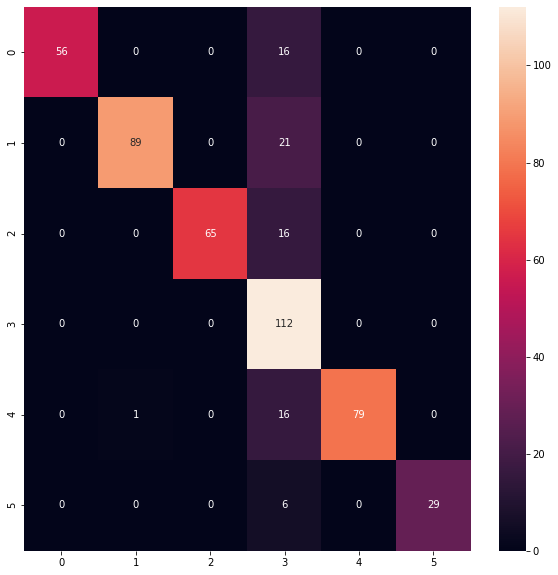

In [199]:
plt.figure(figsize=(10,10))
cm = confusion_matrix(ytest,prediction)
sns.heatmap(cm, annot=True, fmt="d")

In [200]:
#here we can see by changing the attributes, we got a different result for accuracy as well as other parameters

In [25]:
#trying with random forrest classifier

In [33]:
xtrain, xtest, ytrain,ytest = train_test_split (features, labels,test_size=0.20)


In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)


In [34]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 50)
classifier.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

Accuracy :  0.6047430830039525
Prediction is : plastic


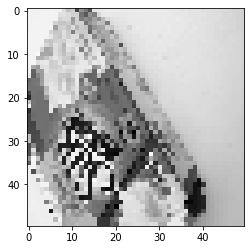

In [36]:
random.shuffle(data)
prediction= classifier.predict(xtest)
accuracy = classifier.score (xtest, ytest)

categories = ['cardboard','glass','metal','paper','plastic','trash']

print('Accuracy : ', accuracy)
print('Prediction is :',categories[prediction[0]])



trash=xtest[0].reshape(50,50)
plt.imshow(trash, cmap='gray')
plt.show()


In [39]:
#using bayesian opt
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials

In [38]:
pip install hyperopt

Note: you may need to restart the kernel to use updated packages.


In [40]:
space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.quniform('max_depth', 10, 50, 100),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200,1300,1500])
    }

In [41]:
space

{'criterion': <hyperopt.pyll.base.Apply at 0x14e60785b88>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x14e60785fc8>,
 'max_features': <hyperopt.pyll.base.Apply at 0x14e60784708>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x14e60784b48>,
 'min_samples_split': <hyperopt.pyll.base.Apply at 0x14e60784fc8>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x14e60756fc8>}

In [55]:
def objective(space):
    model = RandomForestClassifier(criterion = space['criterion'], max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'], 
                                 )
    
    accuracy = cross_val_score(model, features, labels, cv = 5).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

In [56]:
from sklearn.model_selection import cross_val_score
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 80,
            trials= trials)


  0%|                                                                           | 0/80 [00:00<?, ?trial/s, best loss=?]

job exception: estimator should be an estimator implementing 'fit' method, [array([250, 246, 245, ..., 165, 165, 166], dtype=uint8), array([244, 241, 240, ..., 191, 192, 193], dtype=uint8), array([250, 243, 250, ...,  89,  89, 121], dtype=uint8), array([202, 198, 199, ..., 164, 166, 169], dtype=uint8), array([228, 224, 223, ..., 185, 166, 105], dtype=uint8), array([134, 128, 124, ..., 114, 111, 112], dtype=uint8), array([191, 190, 189, ..., 160, 158, 158], dtype=uint8), array([232, 232, 232, ..., 177, 177, 177], dtype=uint8), array([238, 235, 235, ..., 104, 107, 138], dtype=uint8), array([162, 157, 158, ..., 246, 247, 247], dtype=uint8), array([169, 169, 170, ..., 222, 220, 219], dtype=uint8), array([136, 133, 131, ..., 185, 184, 184], dtype=uint8), array([213, 212, 212, ...,  50,  49,  47], dtype=uint8), array([211, 211, 211, ..., 197, 195, 194], dtype=uint8), array([230, 225,  64, ..., 145, 147, 144], dtype=uint8), array([216, 215, 214, ...,  53,  57,  89], dtype=uint8), array([227, 

  0%|                                                                           | 0/80 [00:00<?, ?trial/s, best loss=?]


TypeError: estimator should be an estimator implementing 'fit' method, [array([250, 246, 245, ..., 165, 165, 166], dtype=uint8), array([244, 241, 240, ..., 191, 192, 193], dtype=uint8), array([250, 243, 250, ...,  89,  89, 121], dtype=uint8), array([202, 198, 199, ..., 164, 166, 169], dtype=uint8), array([228, 224, 223, ..., 185, 166, 105], dtype=uint8), array([134, 128, 124, ..., 114, 111, 112], dtype=uint8), array([191, 190, 189, ..., 160, 158, 158], dtype=uint8), array([232, 232, 232, ..., 177, 177, 177], dtype=uint8), array([238, 235, 235, ..., 104, 107, 138], dtype=uint8), array([162, 157, 158, ..., 246, 247, 247], dtype=uint8), array([169, 169, 170, ..., 222, 220, 219], dtype=uint8), array([136, 133, 131, ..., 185, 184, 184], dtype=uint8), array([213, 212, 212, ...,  50,  49,  47], dtype=uint8), array([211, 211, 211, ..., 197, 195, 194], dtype=uint8), array([230, 225,  64, ..., 145, 147, 144], dtype=uint8), array([216, 215, 214, ...,  53,  57,  89], dtype=uint8), array([227, 227, 227, ..., 137, 135, 135], dtype=uint8), array([202, 224, 224, ..., 199, 198, 197], dtype=uint8), array([155, 155, 155, ..., 181, 180, 179], dtype=uint8), array([227, 227, 227, ..., 171, 171, 171], dtype=uint8), array([233, 231, 230, ...,  51,  21,  22], dtype=uint8), array([239, 239, 237, ..., 218, 217, 216], dtype=uint8), array([204, 202, 200, ..., 166, 165, 164], dtype=uint8), array([214, 214, 213, ..., 122, 122, 125], dtype=uint8), array([200, 193, 194, ...,  64,  64,  65], dtype=uint8), array([187, 188, 190, ..., 175, 172, 172], dtype=uint8), array([219, 216, 212, ..., 141, 138, 139], dtype=uint8), array([223, 220, 220, ..., 126, 137, 140], dtype=uint8), array([222, 221, 220, ..., 168, 169, 169], dtype=uint8), array([216, 214, 214, ..., 167, 162, 158], dtype=uint8), array([174, 179, 166, ..., 194, 199, 212], dtype=uint8), array([235, 232, 231, ..., 201,  89, 197], dtype=uint8), array([196, 193, 192, ..., 137, 135, 133], dtype=uint8), array([236, 233, 233, ..., 157, 157, 158], dtype=uint8), array([172, 166, 161, ..., 224, 224, 223], dtype=uint8), array([208, 203, 203, ..., 143, 141, 144], dtype=uint8), array([246, 242, 239, ..., 122, 123, 124], dtype=uint8), array([230, 227, 228, ..., 225, 226, 229], dtype=uint8), array([246, 246, 246, ..., 137, 136, 138], dtype=uint8), array([201, 200, 200, ..., 160, 158, 156], dtype=uint8), array([222, 216, 214, ..., 156, 157, 157], dtype=uint8), array([245, 241, 241, ..., 180, 179, 181], dtype=uint8), array([221, 218, 216, ..., 189, 190, 192], dtype=uint8), array([162, 159, 159, ..., 100, 100, 103], dtype=uint8), array([146, 145, 145, ..., 187, 188, 187], dtype=uint8), array([254, 253, 253, ..., 190, 189, 191], dtype=uint8), array([218, 219, 219, ..., 192, 192, 192], dtype=uint8), array([226, 224, 224, ..., 183, 183, 187], dtype=uint8), array([ 67,  70,  76, ..., 198, 198, 204], dtype=uint8), array([223, 223, 223, ..., 198, 197, 196], dtype=uint8), array([231, 231, 232, ...,  73,  73,  73], dtype=uint8), array([138, 137, 139, ..., 182, 182, 183], dtype=uint8), array([222, 220, 219, ..., 216, 217, 222], dtype=uint8), array([208, 210, 211, ..., 150, 130, 118], dtype=uint8), array([221, 223, 221, ..., 153, 152, 140], dtype=uint8), array([213, 211, 211, ...,  75,  77,  78], dtype=uint8), array([183, 179, 177, ..., 110, 109, 109], dtype=uint8), array([201, 199, 198, ..., 164, 157, 157], dtype=uint8), array([225, 222, 222, ..., 212, 212, 214], dtype=uint8), array([199, 197, 194, ..., 120, 116, 116], dtype=uint8), array([149, 189, 194, ..., 178, 178, 182], dtype=uint8), array([183, 181, 181, ...,  75,  72,  72], dtype=uint8), array([205, 205, 207, ..., 212, 210, 209], dtype=uint8), array([209, 207, 206, ..., 177, 177, 177], dtype=uint8), array([216, 213, 212, ..., 114, 114, 117], dtype=uint8), array([157, 154, 155, ...,  82,  82,  81], dtype=uint8), array([219, 219, 218, ..., 191, 190, 189], dtype=uint8), array([228, 226, 226, ..., 149, 149, 148], dtype=uint8), array([218, 214, 214, ..., 177, 175, 175], dtype=uint8), array([250, 246, 245, ..., 185, 184, 184], dtype=uint8), array([227, 224, 224, ...,  77,  23,  31], dtype=uint8), array([195, 190, 188, ..., 144, 141, 141], dtype=uint8), array([231, 228, 226, ..., 113, 119, 124], dtype=uint8), array([196, 193, 191, ..., 163, 163, 165], dtype=uint8), array([225, 222, 221, ...,  65,  97,  93], dtype=uint8), array([223, 222, 222, ..., 176, 176, 175], dtype=uint8), array([235, 232, 232, ..., 172, 189, 178], dtype=uint8), array([199, 198, 195, ..., 130, 129, 131], dtype=uint8), array([231, 228, 226, ..., 197, 194, 191], dtype=uint8), array([255, 255, 255, ..., 151, 152, 151], dtype=uint8), array([185, 185, 186, ...,  75,  73,  73], dtype=uint8), array([236, 236, 236, ..., 174, 172, 169], dtype=uint8), array([212, 212, 214, ..., 138, 137, 129], dtype=uint8), array([224, 220, 220, ..., 158, 157, 156], dtype=uint8), array([136, 135, 135, ..., 163, 162, 165], dtype=uint8), array([218, 215, 214, ..., 156, 155, 155], dtype=uint8), array([243, 242, 241, ..., 193, 191, 189], dtype=uint8), array([255, 255, 194, ..., 129, 127, 131], dtype=uint8), array([186, 181, 178, ..., 157, 160, 167], dtype=uint8), array([207, 204, 204, ..., 169, 168, 168], dtype=uint8), array([217, 219, 220, ...,  86,  84,  81], dtype=uint8), array([215, 215, 213, ..., 155, 155, 157], dtype=uint8), array([189, 192, 197, ...,  88,  88,  88], dtype=uint8), array([229, 226, 226, ..., 116,  16,  14], dtype=uint8), array([ 98,  99, 103, ...,  64,  65,  66], dtype=uint8), array([144, 146, 145, ...,  90,  90,  90], dtype=uint8), array([216, 216, 217, ..., 186, 184, 183], dtype=uint8), array([223, 220, 220, ..., 174, 174, 174], dtype=uint8), array([217, 215, 215, ..., 159, 159, 158], dtype=uint8), array([222, 219, 218, ..., 148, 148, 150], dtype=uint8), array([220, 218, 216, ..., 185, 184, 186], dtype=uint8), array([129, 127, 126, ..., 143, 140, 134], dtype=uint8), array([255, 251, 246, ..., 164, 165, 165], dtype=uint8), array([220, 217, 216, ..., 172, 172, 174], dtype=uint8), array([228, 228, 227, ..., 170, 168, 170], dtype=uint8), array([198, 196, 196, ..., 161, 161, 159], dtype=uint8), array([227, 223, 221, ..., 115, 116, 116], dtype=uint8), array([214, 212, 211, ..., 165, 165, 166], dtype=uint8), array([175, 149, 140, ..., 209, 209, 211], dtype=uint8), array([161, 159, 158, ..., 136, 135, 134], dtype=uint8), array([242, 240, 238, ..., 183, 181, 181], dtype=uint8), array([ 50,  47,  46, ..., 117, 112, 111], dtype=uint8), array([203, 203, 203, ...,  75,  74,  74], dtype=uint8), array([225, 222, 222, ..., 187, 187, 187], dtype=uint8), array([250, 247, 248, ..., 213, 212, 211], dtype=uint8), array([255, 253, 251, ..., 165, 164, 165], dtype=uint8), array([149, 145, 140, ..., 200, 193, 199], dtype=uint8), array([233, 230, 229, ..., 173, 171, 173], dtype=uint8), array([ 81,  94,  79, ..., 209, 218, 187], dtype=uint8), array([231, 228, 227, ..., 109, 103,  97], dtype=uint8), array([215, 212, 212, ..., 137, 143, 148], dtype=uint8), array([222, 219, 218, ..., 182, 181, 183], dtype=uint8), array([214, 213, 211, ..., 138, 143, 144], dtype=uint8), array([113, 113, 113, ..., 175, 176, 177], dtype=uint8), array([186, 184, 184, ..., 131, 135, 138], dtype=uint8), array([212, 212, 210, ..., 233, 232, 233], dtype=uint8), array([222, 220, 219, ..., 163, 163, 164], dtype=uint8), array([229, 226, 225, ..., 202, 197, 194], dtype=uint8), array([224, 222, 221, ..., 156,  95, 105], dtype=uint8), array([225, 222, 222, ..., 150, 151, 155], dtype=uint8), array([255, 255, 255, ..., 162, 164, 172], dtype=uint8), array([253, 250, 247, ..., 191, 192, 195], dtype=uint8), array([168, 255, 230, ..., 208, 210, 212], dtype=uint8), array([230, 231, 231, ..., 220, 219, 218], dtype=uint8), array([243, 241, 240, ...,  32,  30,  30], dtype=uint8), array([208, 210, 208, ..., 168, 156, 151], dtype=uint8), array([255, 254, 254, ...,  36, 177, 175], dtype=uint8), array([198, 198, 199, ..., 179, 176, 175], dtype=uint8), array([194, 194, 195, ..., 215, 213, 215], dtype=uint8), array([135, 124, 103, ...,  86,  84,  75], dtype=uint8), array([172, 152, 169, ..., 104, 108,  99], dtype=uint8), array([222, 221, 221, ..., 147, 145, 144], dtype=uint8), array([217, 216, 217, ..., 177, 177, 178], dtype=uint8), array([211, 207, 206, ..., 168, 168, 169], dtype=uint8), array([247, 245, 243, ..., 193, 194, 194], dtype=uint8), array([222, 222, 220, ..., 167, 168, 169], dtype=uint8), array([224, 225, 225, ..., 132, 133, 120], dtype=uint8), array([194, 190, 188, ...,  98,  95,  92], dtype=uint8), array([254, 254, 254, ..., 203, 203, 203], dtype=uint8), array([222, 220, 218, ..., 164, 164, 168], dtype=uint8), array([165, 165, 166, ...,  77,  78,  79], dtype=uint8), array([238, 236, 235, ..., 203, 204, 208], dtype=uint8), array([ 48,  60,  48, ..., 197, 197, 198], dtype=uint8), array([220, 218, 215, ..., 163, 163, 164], dtype=uint8), array([219, 216, 217, ..., 155, 156, 160], dtype=uint8), array([ 94,  91, 192, ..., 225, 225, 229], dtype=uint8), array([207, 203, 202, ..., 158, 156, 158], dtype=uint8), array([ 39,  34,  37, ..., 169, 167, 165], dtype=uint8), array([229, 225, 224, ..., 145, 142, 145], dtype=uint8), array([228, 225, 224, ..., 164, 166, 169], dtype=uint8), array([211, 211, 212, ...,  76,  75,  74], dtype=uint8), array([209, 210, 210, ..., 149, 125, 133], dtype=uint8), array([194, 180, 154, ...,  32,  36,  41], dtype=uint8), array([225, 223, 224, ..., 171, 170, 171], dtype=uint8), array([232, 229, 229, ...,  82, 111,  92], dtype=uint8), array([219, 215, 212, ..., 152, 148, 146], dtype=uint8), array([230, 230, 230, ...,  67,  79,  80], dtype=uint8), array([198, 195, 195, ..., 143, 138, 136], dtype=uint8), array([219, 216, 215, ..., 150, 153, 154], dtype=uint8), array([225, 223, 223, ..., 156, 156, 157], dtype=uint8), array([111, 130,  94, ..., 169, 170, 172], dtype=uint8), array([218, 215, 214, ..., 126, 132, 146], dtype=uint8), array([222, 220, 216, ..., 158, 160, 160], dtype=uint8), array([245, 242, 241, ..., 189, 188, 189], dtype=uint8), array([192, 189, 186, ..., 231, 252,  78], dtype=uint8), array([154, 146, 138, ..., 158, 152, 145], dtype=uint8), array([197, 195, 192, ..., 126, 122, 121], dtype=uint8), array([217, 213, 212, ..., 183, 183, 187], dtype=uint8), array([212, 207, 206, ..., 164, 164, 167], dtype=uint8), array([103, 218,  91, ..., 205, 205, 208], dtype=uint8), array([205, 203, 201, ..., 186, 186, 184], dtype=uint8), array([255, 255, 246, ..., 171, 173, 172], dtype=uint8), array([255, 255, 255, ..., 146, 145, 147], dtype=uint8), array([169, 170, 169, ..., 140, 139, 141], dtype=uint8), array([219, 218, 217, ..., 169, 164, 159], dtype=uint8), array([207, 208, 209, ..., 135, 135, 134], dtype=uint8), array([228, 224, 223, ..., 126, 128, 128], dtype=uint8), array([142, 139, 135, ..., 252, 253, 255], dtype=uint8), array([203, 205, 205, ..., 149, 147, 144], dtype=uint8), array([214, 214, 215, ..., 205, 203, 202], dtype=uint8), array([189, 187, 185, ..., 123, 127, 122], dtype=uint8), array([158, 156, 145, ..., 212, 212, 212], dtype=uint8), array([248, 246, 245, ..., 153, 154, 154], dtype=uint8), array([207, 207, 206, ..., 105, 104, 103], dtype=uint8), array([212, 211, 211, ..., 179, 179, 181], dtype=uint8), array([219, 217, 216, ..., 188, 189, 190], dtype=uint8), array([211, 207, 205, ..., 150, 149, 145], dtype=uint8), array([241, 237, 235, ..., 160, 163, 164], dtype=uint8), array([146, 144, 144, ...,  49,  49,  49], dtype=uint8), array([255, 255, 255, ..., 173, 171, 174], dtype=uint8), array([213, 201, 197, ..., 190, 191, 191], dtype=uint8), array([207, 210, 212, ..., 171, 169, 166], dtype=uint8), array([219, 220, 220, ..., 152, 153, 152], dtype=uint8), array([214, 214, 214, ...,  85,  82,  80], dtype=uint8), array([228, 224, 224, ..., 181, 182, 184], dtype=uint8), array([214, 213, 214, ..., 180, 177, 175], dtype=uint8), array([215, 215, 214, ..., 162, 160, 160], dtype=uint8), array([157, 170, 159, ..., 171, 169, 172], dtype=uint8), array([217, 218, 218, ..., 209, 208, 207], dtype=uint8), array([198, 197, 198, ..., 172, 170, 171], dtype=uint8), array([219, 216, 216, ..., 151, 151, 150], dtype=uint8), array([210, 207, 208, ...,  49,  56,  26], dtype=uint8), array([194, 190, 187, ..., 194, 193, 192], dtype=uint8), array([206, 202, 201, ..., 164, 166, 169], dtype=uint8), array([116, 177,  92, ..., 181, 183, 183], dtype=uint8), array([218, 218, 218, ..., 208, 206, 205], dtype=uint8), array([ 72, 118, 200, ..., 174, 174, 176], dtype=uint8), array([165, 160, 158, ..., 114, 110, 107], dtype=uint8), array([203, 202, 186, ..., 148, 135, 141], dtype=uint8), array([118, 123, 188, ..., 178, 177, 160], dtype=uint8), array([226, 224, 222, ..., 196, 195, 193], dtype=uint8), array([251, 248, 246, ..., 171, 168, 170], dtype=uint8), array([209, 209, 209, ..., 185, 182, 180], dtype=uint8), array([226, 223, 223, ..., 171, 170, 172], dtype=uint8), array([235, 231, 230, ..., 189, 189, 191], dtype=uint8), array([199, 197, 196, ..., 154, 152, 152], dtype=uint8), array([206, 202, 201, ..., 166, 165, 165], dtype=uint8), array([218, 215, 214, ..., 165, 160, 158], dtype=uint8), array([159, 159, 160, ..., 144, 142, 141], dtype=uint8), array([234, 228, 227, ..., 189, 187, 188], dtype=uint8), array([183, 183, 183, ..., 155, 153, 153], dtype=uint8), array([146, 146, 147, ..., 130, 128, 127], dtype=uint8), array([186, 184, 182, ..., 201, 207, 209], dtype=uint8), array([198, 196, 195, ..., 154, 120, 124], dtype=uint8), array([130, 128, 131, ..., 165, 157, 155], dtype=uint8), array([225, 223, 222, ..., 162, 146, 157], dtype=uint8), array([184, 180, 178, ..., 130, 132, 127], dtype=uint8), array([228, 225, 224, ..., 161, 161, 165], dtype=uint8), array([169, 163, 161, ..., 132, 136, 140], dtype=uint8), array([227, 227, 227, ..., 172, 170, 167], dtype=uint8), array([214, 209, 210, ..., 166, 168, 170], dtype=uint8), array([226, 224, 224, ..., 166, 168, 171], dtype=uint8), array([245, 242, 241, ..., 179, 180, 184], dtype=uint8), array([239, 220, 153, ..., 133, 134, 135], dtype=uint8), array([255, 255, 255, ...,  66,  71,  36], dtype=uint8), array([ 56,  69,  70, ..., 204, 206, 207], dtype=uint8), array([212, 212, 212, ...,  92,  88,  88], dtype=uint8), array([199, 199, 199, ..., 172, 170, 167], dtype=uint8), array([ 91,  87,  88, ..., 132, 150, 179], dtype=uint8), array([218, 218, 219, ...,  95,  94,  91], dtype=uint8), array([248, 245, 242, ...,  73,  78,  83], dtype=uint8), array([223, 221, 221, ..., 180, 180, 182], dtype=uint8), array([195, 194, 194, ..., 140, 138, 136], dtype=uint8), array([220, 223, 222, ..., 119, 119, 119], dtype=uint8), array([205, 201, 201, ...,  96,  94,  95], dtype=uint8), array([232, 230, 229, ..., 181, 181, 183], dtype=uint8), array([161, 156, 158, ...,  86,  96, 106], dtype=uint8), array([228, 227, 228, ..., 109, 102, 115], dtype=uint8), array([229, 225, 223, ..., 159, 160, 161], dtype=uint8), array([169, 167, 170, ..., 199, 201, 205], dtype=uint8), array([254, 254, 254, ..., 243, 241, 241], dtype=uint8), array([180, 180, 181, ..., 120, 118, 118], dtype=uint8), array([210, 207, 208, ..., 137, 139, 142], dtype=uint8), array([241, 241, 241, ...,  69, 169, 179], dtype=uint8), array([220, 218, 218, ..., 135, 160, 165], dtype=uint8), array([228, 227, 227, ..., 185, 185, 184], dtype=uint8), array([ 97,  79,  93, ..., 118, 114, 114], dtype=uint8), array([226, 222, 222, ..., 199, 200, 200], dtype=uint8), array([236, 233, 234, ..., 201, 199, 199], dtype=uint8), array([227, 224, 224, ..., 151, 151, 150], dtype=uint8), array([236, 234, 234, ..., 223, 224, 225], dtype=uint8), array([209, 208, 209, ...,  94,  90,  86], dtype=uint8), array([228, 225, 224, ..., 179, 179, 182], dtype=uint8), array([184, 184, 183, ..., 177, 176, 174], dtype=uint8), array([189, 191, 190, ..., 150, 148, 144], dtype=uint8), array([166, 166, 164, ..., 224, 225, 224], dtype=uint8), array([244, 242, 240, ..., 187, 187, 189], dtype=uint8), array([205, 205, 206, ..., 181, 180, 178], dtype=uint8), array([212, 209, 208, ..., 148, 120,  83], dtype=uint8), array([209, 207, 205, ..., 167, 166, 166], dtype=uint8), array([134, 169, 126, ...,  95,  94,  97], dtype=uint8), array([250, 246, 244, ..., 161, 163, 163], dtype=uint8), array([237, 233, 231, ..., 176, 174, 177], dtype=uint8), array([106,  80,  57, ..., 171, 172, 175], dtype=uint8), array([226, 225, 224, ..., 137, 145, 156], dtype=uint8), array([186, 184, 185, ..., 174, 172, 171], dtype=uint8), array([204, 205, 207, ..., 218, 217, 217], dtype=uint8), array([227, 228, 228, ...,  86,  82,  83], dtype=uint8), array([160, 159, 159, ..., 106, 107, 107], dtype=uint8), array([205, 205, 205, ..., 204, 200, 198], dtype=uint8), array([220, 218, 219, ..., 190, 190, 192], dtype=uint8), array([ 88, 144, 248, ...,  91,  98, 101], dtype=uint8), array([217, 214, 215, ..., 172, 171, 174], dtype=uint8), array([202, 202, 196, ..., 156, 156, 157], dtype=uint8), array([205, 206, 206, ...,  79,  79,  79], dtype=uint8), array([211, 209, 210, ..., 216, 213, 213], dtype=uint8), array([220, 217, 215, ..., 130, 157, 172], dtype=uint8), array([181, 182, 184, ..., 137, 136, 136], dtype=uint8), array([246, 245, 244, ..., 178, 169, 165], dtype=uint8), array([208, 206, 207, ..., 151, 152, 153], dtype=uint8), array([224, 223, 240, ..., 169, 171, 172], dtype=uint8), array([192, 190, 192, ..., 195, 195, 192], dtype=uint8), array([192, 191, 190, ...,  95,  96, 107], dtype=uint8), array([197, 193, 183, ..., 144, 143, 142], dtype=uint8), array([209, 207, 204, ..., 131, 124, 109], dtype=uint8), array([255, 255, 255, ..., 217, 221, 222], dtype=uint8), array([255, 255, 255, ..., 162, 166, 169], dtype=uint8), array([236, 229, 225, ..., 191, 190, 190], dtype=uint8), array([255, 255, 255, ..., 148, 147, 149], dtype=uint8), array([225, 224, 223, ..., 198, 198, 201], dtype=uint8), array([197, 152, 153, ..., 166, 166, 166], dtype=uint8), array([246, 243, 242, ..., 183, 184, 184], dtype=uint8), array([241, 239, 239, ..., 201, 199, 198], dtype=uint8), array([206, 207, 209, ..., 181, 184, 185], dtype=uint8), array([216, 216, 217, ..., 126, 125, 125], dtype=uint8), array([210, 209, 208, ..., 163, 157, 149], dtype=uint8), array([199, 197, 198, ..., 174, 177, 183], dtype=uint8), array([242, 241, 240, ..., 191, 189, 192], dtype=uint8), array([255, 255, 255, ..., 206, 205, 203], dtype=uint8), array([235, 234, 233, ..., 167, 165, 162], dtype=uint8), array([215, 216, 216, ...,  85,  83,  82], dtype=uint8), array([231, 228, 228, ..., 158, 156, 158], dtype=uint8), array([197, 193, 180, ..., 173, 179, 178], dtype=uint8), array([217, 212, 211, ..., 181, 181, 187], dtype=uint8), array([147, 147, 148, ...,  58,  59,  58], dtype=uint8), array([69, 97, 39, ..., 38, 40, 44], dtype=uint8), array([224, 223, 223, ..., 191, 190, 191], dtype=uint8), array([246, 243, 239, ..., 146, 147, 146], dtype=uint8), array([243, 240, 232, ..., 189, 189, 191], dtype=uint8), array([118, 115, 113, ...,  53,  56,  55], dtype=uint8), array([217, 217, 218, ..., 177, 173, 170], dtype=uint8), array([216, 215, 214, ..., 177, 176, 175], dtype=uint8), array([237, 233, 232, ..., 196, 196, 198], dtype=uint8), array([231, 226, 223, ..., 152, 154, 156], dtype=uint8), array([170, 168, 167, ..., 195, 193, 192], dtype=uint8), array([229, 229, 229, ..., 171, 167, 166], dtype=uint8), array([241, 241, 241, ...,  83,  85, 111], dtype=uint8), array([226, 222, 222, ..., 144, 145, 148], dtype=uint8), array([195, 200, 191, ..., 126, 123, 118], dtype=uint8), array([151, 155, 156, ..., 137, 133, 130], dtype=uint8), array([220, 217, 219, ..., 105, 102, 103], dtype=uint8), array([181, 182, 182, ..., 136, 137, 136], dtype=uint8), array([245, 242, 240, ..., 170, 171, 170], dtype=uint8), array([255, 254, 254, ..., 170, 170, 172], dtype=uint8), array([233, 225, 222, ...,  76,  79,  79], dtype=uint8), array([221, 221, 221, ..., 186, 184, 182], dtype=uint8), array([225, 222, 221, ..., 183, 183, 182], dtype=uint8), array([255, 255, 207, ..., 175, 176, 177], dtype=uint8), array([211, 211, 212, ..., 157, 155, 153], dtype=uint8), array([145, 131, 146, ..., 226, 222, 223], dtype=uint8), array([213, 211, 210, ..., 156, 155, 155], dtype=uint8), array([220, 215, 214, ..., 148, 148, 149], dtype=uint8), array([234, 230, 228, ..., 154, 152, 149], dtype=uint8), array([220, 220, 217, ..., 170, 168, 166], dtype=uint8), array([225, 221, 220, ..., 171, 172, 171], dtype=uint8), array([198, 197, 196, ...,  98, 102, 103], dtype=uint8), array([212, 211, 210, ..., 146, 138, 132], dtype=uint8), array([239, 239, 239, ..., 171, 170, 169], dtype=uint8), array([234, 231, 230, ..., 205, 205, 208], dtype=uint8), array([197, 198, 196, ...,  80,  84,  90], dtype=uint8), array([205, 202, 202, ..., 208, 208, 210], dtype=uint8), array([194, 187, 189, ..., 123, 122, 130], dtype=uint8), array([227, 227, 227, ..., 190, 189, 189], dtype=uint8), array([164, 161, 162, ..., 202, 207, 210], dtype=uint8), array([221, 221, 222, ..., 201, 199, 194], dtype=uint8), array([ 23,  26,  26, ..., 177, 178, 180], dtype=uint8), array([195, 191, 191, ..., 149, 149, 150], dtype=uint8), array([124, 123, 123, ..., 209, 210, 208], dtype=uint8), array([238, 235, 232, ..., 195, 195, 198], dtype=uint8), array([207, 206, 204, ..., 188, 187, 184], dtype=uint8), array([198, 212, 212, ..., 148, 149, 147], dtype=uint8), array([216, 215, 214, ..., 136, 136, 136], dtype=uint8), array([220, 219, 220, ...,  96,  93,  91], dtype=uint8), array([228, 225, 224, ..., 130, 127, 125], dtype=uint8), array([220, 217, 216, ..., 128, 128, 127], dtype=uint8), array([247, 244, 243, ..., 178, 179, 181], dtype=uint8), array([222, 213, 218, ..., 103,  57,  25], dtype=uint8), array([162, 163, 161, ..., 140, 142, 147], dtype=uint8), array([211, 211, 212, ..., 168, 167, 164], dtype=uint8), array([106, 103, 104, ..., 210, 211, 213], dtype=uint8), array([215, 212, 208, ..., 124, 124, 128], dtype=uint8), array([160, 160, 165, ..., 105, 100,  98], dtype=uint8), array([219, 220, 222, ..., 222, 220, 221], dtype=uint8), array([155, 156, 157, ...,  86,  87,  86], dtype=uint8), array([217, 218, 218, ...,  81,  80,  80], dtype=uint8), array([216, 214, 213, ..., 133, 134, 136], dtype=uint8), array([212, 202, 196, ..., 156, 153, 152], dtype=uint8), array([164, 164, 165, ..., 148, 146, 147], dtype=uint8), array([237, 234, 231, ..., 135, 133, 134], dtype=uint8), array([175, 175, 177, ..., 165, 162, 161], dtype=uint8), array([164, 162, 164, ..., 128, 126, 124], dtype=uint8), array([199, 200, 200, ..., 150, 150, 148], dtype=uint8), array([218, 210, 210, ..., 158, 160, 159], dtype=uint8), array([211, 208, 208, ..., 190, 190, 190], dtype=uint8), array([235, 231, 229, ..., 182, 180, 175], dtype=uint8), array([220, 219, 218, ..., 151, 151, 151], dtype=uint8), array([154, 152, 150, ..., 180, 180, 181], dtype=uint8), array([161, 160, 162, ..., 202, 201, 198], dtype=uint8), array([221, 222, 223, ..., 195, 195, 194], dtype=uint8), array([192, 189, 188, ...,  52,  47,  47], dtype=uint8), array([189, 194, 191, ..., 135, 132, 130], dtype=uint8), array([221, 218, 216, ..., 128, 127, 127], dtype=uint8), array([204, 203, 204, ..., 195, 201, 199], dtype=uint8), array([254, 255, 240, ..., 116, 117, 120], dtype=uint8), array([204, 193, 192, ..., 153, 137, 148], dtype=uint8), array([199, 196, 196, ..., 178, 178, 178], dtype=uint8), array([ 88,  78,  81, ..., 255, 255, 255], dtype=uint8), array([166, 167, 168, ..., 106, 102, 104], dtype=uint8), array([198, 198, 189, ..., 133, 137, 137], dtype=uint8), array([236, 236, 236, ..., 226, 224, 222], dtype=uint8), array([ 68,  66,  67, ..., 227, 224, 220], dtype=uint8), array([175, 175, 177, ..., 162, 159, 158], dtype=uint8), array([151, 151, 150, ..., 209, 209, 211], dtype=uint8), array([231, 228, 225, ..., 123, 125, 125], dtype=uint8), array([215, 212, 211, ..., 161, 165, 169], dtype=uint8), array([228, 225, 224, ..., 185, 153, 187], dtype=uint8), array([180, 176, 174, ..., 138, 138, 139], dtype=uint8), array([178, 178, 178, ..., 203, 201, 200], dtype=uint8), array([132, 131, 130, ..., 136, 135, 133], dtype=uint8), array([255, 255, 255, ..., 111, 112, 116], dtype=uint8), array([224, 222, 221, ..., 178, 178, 180], dtype=uint8), array([214, 214, 215, ..., 178, 176, 172], dtype=uint8), array([211, 212, 212, ...,  86,  86,  86], dtype=uint8), array([218, 219, 219, ..., 224, 223, 223], dtype=uint8), array([241, 241, 241, ..., 197, 197, 197], dtype=uint8), array([194, 190, 190, ..., 212, 213, 214], dtype=uint8), array([226, 224, 225, ..., 125, 119, 113], dtype=uint8), array([223, 220, 222, ..., 168, 168, 165], dtype=uint8), array([135,  29, 175, ...,  51,  34,  46], dtype=uint8), array([223, 220, 220, ..., 164, 164, 164], dtype=uint8), array([252, 151, 168, ..., 168, 163, 160], dtype=uint8), array([228, 225, 225, ...,  21,  22, 110], dtype=uint8), array([249, 249, 250, ..., 191, 190, 189], dtype=uint8), array([196, 200, 203, ..., 211, 208, 208], dtype=uint8), array([224, 221, 221, ..., 127, 126, 124], dtype=uint8), array([131, 130, 125, ..., 182, 194, 202], dtype=uint8), array([209, 209, 210, ..., 167, 167, 166], dtype=uint8), array([221, 222, 221, ...,  23,  56,  28], dtype=uint8), array([218, 219, 220, ...,  81,  85,  83], dtype=uint8), array([134, 128, 128, ..., 157, 155, 153], dtype=uint8), array([187, 188, 189, ...,  88,  87,  87], dtype=uint8), array([219, 217, 217, ..., 158, 158, 155], dtype=uint8), array([221, 218, 216, ..., 155, 153, 153], dtype=uint8), array([248, 246, 246, ..., 217, 216, 217], dtype=uint8), array([215, 216, 215, ..., 108, 111, 108], dtype=uint8), array([ 28,  25,  28, ..., 185, 184, 183], dtype=uint8), array([ 88,  92, 110, ..., 155, 157, 155], dtype=uint8), array([221, 219, 219, ..., 168, 172, 173], dtype=uint8), array([216, 216, 216, ..., 168, 166, 165], dtype=uint8), array([226, 223, 222, ..., 148, 150, 152], dtype=uint8), array([222, 222, 222, ..., 195, 194, 192], dtype=uint8), array([222, 222, 222, ...,  68,  59,  48], dtype=uint8), array([255, 255, 255, ..., 101, 106, 114], dtype=uint8), array([255, 255, 255, ..., 138, 138, 140], dtype=uint8), array([228, 226, 226, ..., 202, 201, 204], dtype=uint8), array([107, 105, 107, ..., 159, 159, 160], dtype=uint8), array([245, 244, 241, ..., 188, 187, 187], dtype=uint8), array([219, 217, 216, ..., 119, 126, 132], dtype=uint8), array([210, 210, 212, ..., 191, 184, 181], dtype=uint8), array([238, 234, 233, ..., 110, 110, 112], dtype=uint8), array([192, 196, 200, ..., 137, 144, 138], dtype=uint8), array([234, 212, 238, ..., 186, 187, 187], dtype=uint8), array([168, 169, 170, ..., 147, 143, 140], dtype=uint8), array([157, 157, 156, ..., 139, 137, 136], dtype=uint8), array([214, 215, 215, ..., 163, 158, 153], dtype=uint8), array([221, 222, 222, ..., 101, 100,  99], dtype=uint8), array([204, 201, 201, ..., 156, 156, 156], dtype=uint8), array([231, 229, 230, ..., 162, 152, 133], dtype=uint8), array([178, 181, 179, ..., 104, 103, 106], dtype=uint8), array([207, 212, 206, ..., 143, 151, 141], dtype=uint8), array([207, 204, 203, ..., 166, 165, 166], dtype=uint8), array([209, 206, 205, ..., 150, 149, 148], dtype=uint8), array([220, 217, 216, ..., 128, 134, 142], dtype=uint8), array([213, 210, 210, ..., 144, 143, 139], dtype=uint8), array([236, 235, 234, ..., 118, 219, 221], dtype=uint8), array([208, 206, 204, ..., 155, 153, 153], dtype=uint8), array([239, 235, 234, ..., 185, 185, 184], dtype=uint8), array([210, 211, 211, ...,  76,  75,  66], dtype=uint8), array([234, 234, 234, ..., 183, 180, 180], dtype=uint8), array([181, 186, 184, ..., 145, 146, 144], dtype=uint8), array([250, 247, 245, ..., 139, 139, 137], dtype=uint8), array([154, 149, 151, ...,  39,  37,  37], dtype=uint8), array([214, 212, 210, ..., 214, 214, 211], dtype=uint8), array([210, 210, 209, ..., 195, 194, 193], dtype=uint8), array([157, 155,  97, ...,  75,  71,  79], dtype=uint8), array([224, 222, 221, ...,  56,  51,  78], dtype=uint8), array([177, 178, 178, ..., 128, 125, 132], dtype=uint8), array([214, 214, 214, ..., 192, 190, 190], dtype=uint8), array([209, 198, 191, ..., 164, 169, 171], dtype=uint8), array([223, 220, 219, ..., 159, 161, 161], dtype=uint8), array([236, 235, 234, ...,  68,  65, 100], dtype=uint8), array([216, 215, 216, ..., 119, 115, 116], dtype=uint8), array([228, 227, 227, ..., 174, 180, 187], dtype=uint8), array([143, 143, 144, ..., 116, 116, 115], dtype=uint8), array([139, 140, 143, ...,  39,  86, 228], dtype=uint8), array([216, 215, 216, ..., 152, 147, 147], dtype=uint8), array([205, 204, 203, ...,  76,  97,  55], dtype=uint8), array([213, 211, 210, ..., 171, 170, 172], dtype=uint8), array([207, 204, 206, ..., 164, 165, 165], dtype=uint8), array([245, 243, 242, ..., 182, 181, 184], dtype=uint8), array([200, 202, 202, ..., 171, 171, 175], dtype=uint8), array([189, 186, 186, ..., 174, 174, 177], dtype=uint8), array([222, 219, 218, ..., 177, 178, 178], dtype=uint8), array([145, 148, 150, ..., 125, 122, 118], dtype=uint8), array([206, 206, 208, ..., 183, 181, 180], dtype=uint8), array([199, 202, 204, ..., 183, 177, 172], dtype=uint8), array([226, 224, 226, ..., 213, 213, 213], dtype=uint8), array([136, 129, 146, ..., 157, 152, 151], dtype=uint8), array([226, 226, 225, ..., 199, 197, 197], dtype=uint8), array([210, 210, 210, ..., 146, 145, 145], dtype=uint8), array([206, 207, 208, ..., 196, 196, 194], dtype=uint8), array([234, 233, 232, ...,  33,  31,  27], dtype=uint8), array([233, 230, 230, ..., 180, 181, 180], dtype=uint8), array([219, 217, 215, ..., 177, 177, 175], dtype=uint8), array([203, 204, 204, ..., 151, 149, 147], dtype=uint8), array([213, 211, 212, ..., 158, 157, 158], dtype=uint8), array([238, 235, 235, ...,  47,  47,  47], dtype=uint8), array([231, 227, 225, ..., 152, 150, 151], dtype=uint8), array([223, 222, 220, ..., 159, 158, 160], dtype=uint8), array([232, 231, 231, ..., 164, 165, 166], dtype=uint8), array([176, 172, 169, ..., 171, 162, 158], dtype=uint8), array([210, 207, 205, ..., 190, 191, 194], dtype=uint8), array([143, 143, 143, ..., 157, 153, 152], dtype=uint8), array([157, 145, 191, ..., 161, 159, 161], dtype=uint8), array([238,  58,  56, ..., 230, 231, 228], dtype=uint8), array([209, 208, 207, ..., 140, 140, 141], dtype=uint8), array([227, 223, 221, ..., 194, 192, 194], dtype=uint8), array([199, 193, 194, ..., 163, 162, 164], dtype=uint8), array([216, 217, 216, ..., 160, 160, 158], dtype=uint8), array([223, 222, 222, ..., 199, 196, 195], dtype=uint8), array([229, 224, 224, ...,  86,  85,  92], dtype=uint8), array([174, 169, 169, ..., 153, 152, 151], dtype=uint8), array([165, 163, 164, ..., 106, 105, 105], dtype=uint8), array([242, 239, 237, ..., 165, 166, 166], dtype=uint8), array([219, 218, 217, ..., 115,  99, 139], dtype=uint8), array([223, 220, 220, ..., 151, 153, 155], dtype=uint8), array([221, 219, 218, ..., 167, 166, 168], dtype=uint8), array([211, 211, 212, ..., 181, 180, 178], dtype=uint8), array([186, 181, 180, ..., 155, 154, 156], dtype=uint8), array([137, 138, 140, ..., 128, 128, 128], dtype=uint8), array([159, 160, 161, ..., 142, 141, 138], dtype=uint8), array([134, 132, 132, ..., 130, 128, 126], dtype=uint8), array([133, 132, 134, ..., 195, 195, 197], dtype=uint8), array([205, 211, 208, ..., 175, 172, 169], dtype=uint8), array([221, 218, 218, ..., 165, 166, 169], dtype=uint8), array([232, 232, 231, ...,  94,  91,  88], dtype=uint8), array([150, 146, 150, ..., 172, 176, 235], dtype=uint8), array([227, 226, 226, ...,  76,  76,  75], dtype=uint8), array([204, 205, 207, ..., 202, 200, 198], dtype=uint8), array([145, 144, 145, ..., 205, 206, 205], dtype=uint8), array([174, 147, 171, ..., 193, 254, 254], dtype=uint8), array([238, 233, 230, ..., 168, 168, 173], dtype=uint8), array([228, 225, 226, ..., 183, 183, 184], dtype=uint8), array([236, 233, 232, ..., 163, 162, 163], dtype=uint8), array([142, 148,  93, ...,  16,  18,  22], dtype=uint8), array([162, 162, 162, ..., 127, 125, 122], dtype=uint8), array([230, 229, 227, ..., 195, 195, 199], dtype=uint8), array([139, 140, 142, ..., 223, 224, 227], dtype=uint8), array([233, 230, 229, ..., 137, 136, 139], dtype=uint8), array([203, 204, 206, ..., 191, 190, 190], dtype=uint8), array([222, 219, 219, ..., 170, 170, 171], dtype=uint8), array([162, 192, 163, ..., 101, 100, 102], dtype=uint8), array([210, 207, 207, ..., 161, 153, 141], dtype=uint8), array([249, 242, 240, ..., 160, 160, 160], dtype=uint8), array([198, 189, 192, ..., 112, 111, 115], dtype=uint8), array([254, 254, 254, ...,  63, 162, 169], dtype=uint8), array([145, 118,  83, ..., 231, 228, 227], dtype=uint8), array([178, 179, 179, ..., 134, 136, 132], dtype=uint8), array([213, 213, 214, ..., 222, 222, 221], dtype=uint8), array([212, 213, 211, ..., 145, 144, 144], dtype=uint8), array([236, 233, 233, ...,  56,  35,  45], dtype=uint8), array([214, 213, 216, ...,  90,  87,  92], dtype=uint8), array([214, 214, 214, ..., 171, 169, 165], dtype=uint8), array([202, 198, 196, ..., 131, 131, 134], dtype=uint8), array([135,  55,  55, ..., 145, 146, 150], dtype=uint8), array([248, 248, 247, ..., 142, 142, 121], dtype=uint8), array([220, 212, 204, ..., 223, 211, 107], dtype=uint8), array([166, 164, 163, ..., 165, 161, 163], dtype=uint8), array([214, 212, 210, ..., 169, 138, 147], dtype=uint8), array([173, 197, 130, ..., 172, 173, 175], dtype=uint8), array([178, 178, 177, ..., 171, 170, 168], dtype=uint8), array([186, 188, 187, ...,  98,  98,  96], dtype=uint8), array([212, 211, 210, ..., 211, 211, 214], dtype=uint8), array([254, 252, 237, ..., 221, 221, 222], dtype=uint8), array([190, 190, 190, ..., 173, 171, 167], dtype=uint8), array([237, 236, 235, ..., 185, 184, 186], dtype=uint8), array([243, 240, 237, ..., 132, 133, 132], dtype=uint8), array([197, 197, 197, ..., 187, 185, 184], dtype=uint8), array([192, 212, 215, ..., 181, 184, 187], dtype=uint8), array([221, 219, 219, ..., 175, 174, 175], dtype=uint8), array([244, 240, 240, ..., 220, 220, 222], dtype=uint8), array([236, 234, 232, ..., 180, 178, 178], dtype=uint8), array([229, 228, 227, ..., 191, 192, 192], dtype=uint8), array([116, 116, 117, ..., 152, 148, 145], dtype=uint8), array([210, 200, 198, ..., 121, 115, 112], dtype=uint8), array([208, 209, 207, ..., 122, 123, 119], dtype=uint8), array([216, 213, 212, ...,  47, 196, 197], dtype=uint8), array([221, 213, 211, ..., 127, 127, 128], dtype=uint8), array([221, 217, 217, ..., 165, 165, 167], dtype=uint8), array([202, 204, 205, ..., 204, 203, 202], dtype=uint8), array([229, 226, 226, ..., 222, 222, 225], dtype=uint8), array([208, 207, 206, ...,  90,  69, 109], dtype=uint8), array([237, 233, 234, ...,  42,  42, 107], dtype=uint8), array([149, 146, 147, ...,  72,  74,  72], dtype=uint8), array([241, 238, 234, ..., 202, 204, 206], dtype=uint8), array([172, 167, 157, ..., 109, 114, 106], dtype=uint8), array([255, 255, 255, ..., 206, 203, 201], dtype=uint8), array([220, 218, 218, ..., 181, 182, 184], dtype=uint8), array([205, 204, 203, ..., 127, 129, 128], dtype=uint8), array([228, 228, 228, ..., 176, 177, 175], dtype=uint8), array([213, 213, 216, ..., 137, 137, 137], dtype=uint8), array([192, 183, 182, ..., 108, 129, 123], dtype=uint8), array([205, 200, 199, ..., 150, 148, 149], dtype=uint8), array([205, 206, 204, ..., 186, 185, 181], dtype=uint8), array([212, 210, 210, ..., 121, 119, 118], dtype=uint8), array([211, 211, 212, ..., 162, 160, 156], dtype=uint8), array([232, 230, 230, ..., 192, 192, 191], dtype=uint8), array([228, 225, 225, ..., 200, 200, 202], dtype=uint8), array([240, 235, 236, ..., 178, 178, 177], dtype=uint8), array([215, 213, 214, ..., 113, 107, 102], dtype=uint8), array([241, 236, 232, ..., 185, 181, 179], dtype=uint8), array([203, 205, 205, ..., 153, 153, 152], dtype=uint8), array([213, 211, 212, ...,  95,  93,  93], dtype=uint8), array([235, 235, 232, ..., 175, 174, 174], dtype=uint8), array([212, 200, 202, ..., 178, 179, 181], dtype=uint8), array([211, 208, 208, ..., 151, 151, 152], dtype=uint8), array([224, 223, 222, ..., 127, 131, 134], dtype=uint8), array([222, 222, 222, ...,  88,  85,  84], dtype=uint8), array([246, 239,  73, ..., 165, 165, 166], dtype=uint8), array([220, 217, 216, ..., 155, 154, 155], dtype=uint8), array([228, 235, 245, ..., 126, 129, 132], dtype=uint8), array([231, 229, 228, ..., 110, 235, 237], dtype=uint8), array([215, 212, 213, ..., 162, 158, 148], dtype=uint8), array([255, 255, 255, ..., 114, 113, 124], dtype=uint8), array([202, 197, 203, ..., 156, 149, 143], dtype=uint8), array([184, 184, 183, ..., 192, 192, 192], dtype=uint8), array([230, 228, 227, ...,  57,  72,  64], dtype=uint8), array([210, 207, 205, ..., 134, 134, 134], dtype=uint8), array([238, 232, 231, ..., 145, 145, 147], dtype=uint8), array([254, 254, 254, ..., 128, 136, 127], dtype=uint8), array([244, 241, 241, ..., 128, 124, 134], dtype=uint8), array([255, 255, 251, ..., 124, 125, 124], dtype=uint8), array([198, 196, 195, ..., 116, 116, 117], dtype=uint8), array([227, 223, 219, ..., 206, 207, 207], dtype=uint8), array([195, 195, 195, ..., 194, 191, 191], dtype=uint8), array([242, 239, 239, ..., 202, 204, 208], dtype=uint8), array([224, 221, 222, ..., 174, 174, 175], dtype=uint8), array([207, 208, 208, ...,  79,  79,  77], dtype=uint8), array([220, 217, 217, ..., 175, 178, 180], dtype=uint8), array([ 93, 128, 130, ...,  89,  91,  95], dtype=uint8), array([226, 223, 222, ..., 124, 126, 126], dtype=uint8), array([221, 219, 221, ..., 148, 167, 175], dtype=uint8), array([ 56, 182, 112, ..., 159, 159, 165], dtype=uint8), array([245, 242, 242, ..., 159,  99, 136], dtype=uint8), array([226, 223, 223, ..., 140, 139, 141], dtype=uint8), array([234, 231, 226, ..., 178, 179, 181], dtype=uint8), array([244, 240, 240, ..., 158, 156, 158], dtype=uint8), array([255, 255, 249, ..., 230, 126, 137], dtype=uint8), array([216, 216, 214, ..., 132, 129, 131], dtype=uint8), array([202, 199, 196, ..., 132, 130, 130], dtype=uint8), array([220, 220, 219, ..., 165, 163, 161], dtype=uint8), array([221, 214, 215, ..., 134, 139, 148], dtype=uint8), array([156, 148, 150, ...,  90,  82,  77], dtype=uint8), array([215, 215, 214, ..., 199, 198, 197], dtype=uint8), array([105, 209, 231, ..., 208, 207, 207], dtype=uint8), array([224, 222, 223, ..., 171, 169, 169], dtype=uint8), array([217, 215, 216, ..., 197, 198, 201], dtype=uint8), array([221, 218, 217, ..., 122, 134, 138], dtype=uint8), array([222, 221, 220, ..., 160, 159, 160], dtype=uint8), array([164, 164, 164, ...,  64,  64,  64], dtype=uint8), array([154, 155, 155, ..., 155, 155, 155], dtype=uint8), array([ 64,  87,  73, ..., 172, 121, 113], dtype=uint8), array([246, 246, 246, ..., 158, 158, 159], dtype=uint8), array([173, 157, 147, ..., 174, 216, 116], dtype=uint8), array([ 50,  49,  47, ..., 122, 122, 125], dtype=uint8), array([255, 255, 250, ..., 134, 150,  81], dtype=uint8), array([167, 160, 186, ...,  93,  91,  84], dtype=uint8), array([223, 223, 223, ...,  46,  55,  61], dtype=uint8), array([224, 225, 223, ..., 224, 222, 222], dtype=uint8), array([230, 226, 225, ..., 163, 162, 163], dtype=uint8), array([234, 231, 230, ..., 176, 176, 179], dtype=uint8), array([238, 235, 232, ..., 182, 180, 183], dtype=uint8), array([209, 205, 207, ..., 125, 107, 105], dtype=uint8), array([197, 196, 196, ..., 148, 149, 149], dtype=uint8), array([184, 181, 179, ..., 174, 173, 169], dtype=uint8), array([207, 208, 209, ..., 226, 224, 223], dtype=uint8), array([220, 217, 218, ..., 163, 162, 162], dtype=uint8), array([188, 186, 183, ..., 140, 140, 141], dtype=uint8), array([133,  67,  72, ..., 139, 144, 144], dtype=uint8), array([225, 222, 220, ..., 161, 159, 158], dtype=uint8), array([221, 218, 217, ..., 206, 206, 207], dtype=uint8), array([193, 189, 187, ..., 114, 143, 142], dtype=uint8), array([255, 255, 255, ..., 131, 107,  94], dtype=uint8), array([127, 127, 126, ..., 156, 155, 156], dtype=uint8), array([190, 188, 186, ..., 167, 163, 169], dtype=uint8), array([126, 178, 122, ..., 233, 234, 237], dtype=uint8), array([199, 197, 190, ..., 177, 178, 179], dtype=uint8), array([232, 232, 233, ..., 202, 200, 199], dtype=uint8), array([188, 179, 188, ..., 101,  79,  76], dtype=uint8), array([250, 248, 249, ..., 232, 232, 232], dtype=uint8), array([227, 225, 226, ...,  52,  50, 121], dtype=uint8), array([233, 231, 231, ...,  79,  65,  68], dtype=uint8), array([218, 215, 216, ..., 183, 184, 186], dtype=uint8), array([200, 198, 198, ..., 169, 169, 169], dtype=uint8), array([150, 149, 151, ..., 129, 127, 129], dtype=uint8), array([228, 227, 226, ..., 139, 142, 144], dtype=uint8), array([231, 230, 230, ..., 111, 109, 109], dtype=uint8), array([244, 242, 244, ..., 194, 191, 187], dtype=uint8), array([227, 224, 223, ..., 205, 207, 209], dtype=uint8), array([197, 197, 199, ..., 201, 200, 199], dtype=uint8), array([222, 221, 220, ..., 159, 159, 158], dtype=uint8), array([192, 192, 193, ...,  80,  79,  78], dtype=uint8), array([ 89, 113, 239, ..., 213, 213, 214], dtype=uint8), array([227, 224, 224, ..., 176, 177, 177], dtype=uint8), array([222, 221, 221, ..., 188, 189, 190], dtype=uint8), array([250, 246, 243, ..., 122, 121, 122], dtype=uint8), array([187, 187, 189, ..., 195, 192, 190], dtype=uint8), array([212, 212, 214, ..., 144, 140, 136], dtype=uint8), array([214, 214, 214, ..., 191, 190, 189], dtype=uint8), array([224, 224, 223, ..., 138, 138, 139], dtype=uint8), array([255, 252, 251, ..., 202, 202, 203], dtype=uint8), array([118, 116, 117, ..., 191, 190, 189], dtype=uint8), array([214, 214, 213, ..., 187, 185, 183], dtype=uint8), array([236, 235, 235, ..., 189, 189, 190], dtype=uint8), array([156, 180, 180, ..., 188, 185, 185], dtype=uint8), array([137, 144, 137, ...,  78,  77,  78], dtype=uint8), array([217, 218, 220, ..., 184, 170, 149], dtype=uint8), array([148, 147, 148, ..., 186, 179, 174], dtype=uint8), array([195, 194, 196, ..., 180, 176, 175], dtype=uint8), array([222, 221, 221, ..., 166, 164, 163], dtype=uint8), array([ 62, 169, 243, ...,  69,  78,  81], dtype=uint8), array([108, 160, 159, ...,  96,  97,  97], dtype=uint8), array([244, 244, 245, ..., 194, 195, 195], dtype=uint8), array([235, 230, 228, ..., 163, 162, 164], dtype=uint8), array([108, 106, 107, ..., 161, 157, 152], dtype=uint8), array([206, 206, 207, ..., 146, 139, 135], dtype=uint8), array([245, 241, 239, ..., 171, 171, 171], dtype=uint8), array([245, 243, 240, ..., 194, 193, 196], dtype=uint8), array([202, 202, 202, ..., 222, 221, 221], dtype=uint8), array([230, 228, 227, ...,  77, 109,  50], dtype=uint8), array([219, 217, 216, ...,  97,  95,  95], dtype=uint8), array([225, 223, 222, ..., 168, 167, 168], dtype=uint8), array([232, 229, 228, ..., 172, 251, 224], dtype=uint8), array([221, 218, 218, ..., 140, 146, 152], dtype=uint8), array([168, 170, 170, ..., 149, 146, 146], dtype=uint8), array([108, 134, 136, ...,  86,  87,  89], dtype=uint8), array([239, 237, 237, ...,  87,  86,  86], dtype=uint8), array([181, 178, 178, ..., 105, 105, 105], dtype=uint8), array([191, 191, 193, ...,  83,  82,  83], dtype=uint8), array([210, 212, 214, ..., 220, 221, 219], dtype=uint8), array([224, 242, 241, ...,  61,  56,  69], dtype=uint8), array([210, 210, 211, ..., 175, 175, 172], dtype=uint8), array([130, 130, 128, ..., 132, 128, 124], dtype=uint8), array([175, 176, 175, ..., 152, 151, 150], dtype=uint8), array([196, 181, 190, ..., 221, 222, 222], dtype=uint8), array([171, 160, 165, ..., 157, 156, 148], dtype=uint8), array([138, 137, 139, ..., 182, 182, 183], dtype=uint8), array([222, 219, 217, ..., 173, 171, 172], dtype=uint8), array([176, 172, 175, ...,  37,  37,  37], dtype=uint8), array([225, 223, 221, ..., 203, 201, 200], dtype=uint8), array([216, 214, 213, ..., 183, 183, 185], dtype=uint8), array([203, 204, 206, ..., 207, 206, 204], dtype=uint8), array([224, 221, 221, ..., 143, 142, 141], dtype=uint8), array([228, 225, 226, ..., 151, 150, 150], dtype=uint8), array([227, 224, 224, ...,  28,  33,  83], dtype=uint8), array([217, 217, 218, ..., 179, 177, 173], dtype=uint8), array([230, 227, 227, ..., 178, 177, 178], dtype=uint8), array([209, 207, 207, ..., 165, 169, 170], dtype=uint8), array([171, 172, 173, ..., 150, 149, 147], dtype=uint8), array([233, 230, 230, ..., 162, 161, 157], dtype=uint8), array([229, 229, 230, ..., 203, 203, 202], dtype=uint8), array([155, 156, 156, ..., 114, 112, 110], dtype=uint8), array([222, 222, 221, ..., 110, 107, 103], dtype=uint8), array([228, 228, 226, ..., 134, 134, 132], dtype=uint8), array([249, 246, 246, ..., 224, 224, 224], dtype=uint8), array([244, 238, 237, ..., 149, 150, 150], dtype=uint8), array([221, 217, 215, ..., 131, 133, 136], dtype=uint8), array([180, 181, 181, ...,  71,  71,  71], dtype=uint8), array([213, 211, 210, ..., 180, 180, 178], dtype=uint8), array([187, 189, 191, ..., 200, 200, 197], dtype=uint8), array([212, 210, 211, ..., 173, 172, 170], dtype=uint8), array([222, 223, 224, ..., 180, 178, 178], dtype=uint8), array([166, 163, 163, ..., 106, 116,  58], dtype=uint8), array([207, 159, 139, ..., 172, 169, 175], dtype=uint8), array([236, 236, 236, ..., 223, 222, 222], dtype=uint8), array([228, 222, 216, ..., 157, 155, 156], dtype=uint8), array([213, 210, 215, ..., 109, 108, 106], dtype=uint8), array([225, 222, 221, ..., 164, 165, 167], dtype=uint8), array([228, 224, 223, ..., 155, 154, 155], dtype=uint8), array([198, 198, 128, ...,  75,  76,  78], dtype=uint8), array([159, 160, 159, ..., 144, 143, 142], dtype=uint8), array([218, 219, 221, ..., 234, 236, 236], dtype=uint8), array([212, 209, 210, ..., 156, 158, 160], dtype=uint8), array([207, 209, 208, ..., 219, 218, 216], dtype=uint8), array([211, 212, 212, ..., 167, 164, 160], dtype=uint8), array([212, 211, 210, ..., 186, 185, 184], dtype=uint8), array([254, 252, 251, ..., 194, 194, 194], dtype=uint8), array([212, 212, 213, ..., 204, 203, 201], dtype=uint8), array([213, 210, 210, ..., 151, 150, 152], dtype=uint8), array([242, 242, 243, ..., 207, 204, 203], dtype=uint8), array([219, 219, 219, ..., 194, 142, 200], dtype=uint8), array([212, 208, 207, ..., 179, 178, 179], dtype=uint8), array([161, 159, 159, ..., 154, 154, 154], dtype=uint8), array([213, 210, 209, ..., 148, 149, 150], dtype=uint8), array([227, 225, 223, ..., 161, 162, 162], dtype=uint8), array([213, 210, 214, ..., 176, 174, 176], dtype=uint8), array([216, 214, 216, ...,  16,  46,  94], dtype=uint8), array([215, 215, 217, ..., 146, 143, 140], dtype=uint8), array([225, 221, 221, ..., 159, 159, 163], dtype=uint8), array([175, 172, 165, ..., 114, 124, 121], dtype=uint8), array([239, 235, 219, ..., 148, 148, 149], dtype=uint8), array([153, 155, 156, ..., 101,  97,  91], dtype=uint8), array([220, 218, 209, ..., 102, 104, 104], dtype=uint8), array([203, 205, 206, ..., 209, 205, 203], dtype=uint8), array([183, 185, 187, ..., 158, 157, 156], dtype=uint8), array([212, 212, 212, ..., 183, 181, 177], dtype=uint8), array([188, 187, 184, ..., 155, 153, 157], dtype=uint8), array([128, 168, 151, ..., 207, 187, 171], dtype=uint8), array([200, 197, 196, ..., 104, 193, 195], dtype=uint8), array([194, 195, 194, ..., 189, 188, 188], dtype=uint8), array([168, 169, 169, ..., 195, 194, 193], dtype=uint8), array([254, 252, 250, ..., 188, 189, 192], dtype=uint8), array([181, 178, 176, ..., 143, 137, 147], dtype=uint8), array([ 67,  67,  78, ..., 212, 221, 161], dtype=uint8), array([233, 233, 232, ..., 175, 169, 168], dtype=uint8), array([ 89,  87,  86, ..., 192, 192, 195], dtype=uint8), array([220, 218, 218, ..., 146, 147, 151], dtype=uint8), array([217, 215, 213, ..., 165, 167, 167], dtype=uint8), array([202, 202, 203, ...,  75,  74,  74], dtype=uint8), array([146, 144, 143, ..., 211, 211, 214], dtype=uint8), array([219, 219, 220, ..., 213, 212, 208], dtype=uint8), array([186, 190, 197, ..., 146, 149, 139], dtype=uint8), array([220, 217, 217, ..., 167, 167, 166], dtype=uint8), array([233, 229, 228, ..., 142, 145, 146], dtype=uint8), array([194, 193, 193, ..., 175, 168, 169], dtype=uint8), array([132, 130, 128, ...,  95,  89,  85], dtype=uint8), array([217, 214, 213, ..., 174, 169, 163], dtype=uint8), array([250, 249, 240, ..., 168, 169, 168], dtype=uint8), array([209, 207, 208, ..., 178, 177, 176], dtype=uint8), array([223, 220, 220, ..., 183, 182, 184], dtype=uint8), array([215, 215, 216, ..., 161, 160, 157], dtype=uint8), array([240, 241, 240, ..., 186, 184, 181], dtype=uint8), array([245, 243, 241, ...,  52,  52,  55], dtype=uint8), array([243, 242, 242, ..., 159, 162, 164], dtype=uint8), array([251, 252, 252, ..., 234, 233, 232], dtype=uint8), array([208, 206, 208, ..., 160, 161, 161], dtype=uint8), array([214, 215, 215, ..., 169, 166, 164], dtype=uint8), array([223, 224, 224, ..., 208, 208, 208], dtype=uint8), array([211, 209, 213, ..., 173, 172, 171], dtype=uint8), array([214, 214, 213, ..., 188, 187, 185], dtype=uint8), array([130, 130, 131, ..., 136, 136, 134], dtype=uint8), array([214, 213, 212, ..., 185, 185, 186], dtype=uint8), array([219, 217, 216, ..., 156, 156, 157], dtype=uint8), array([223, 220, 218, ..., 164, 164, 166], dtype=uint8), array([140, 133, 133, ..., 181, 180, 187], dtype=uint8), array([198, 197, 197, ..., 169, 168, 167], dtype=uint8), array([216, 215, 215, ...,  75, 107,  96], dtype=uint8), array([193, 193, 193, ..., 123, 114, 106], dtype=uint8), array([197, 196, 197, ..., 118, 115, 112], dtype=uint8), array([223, 224, 223, ..., 200, 198, 198], dtype=uint8), array([192, 187, 183, ..., 167, 152, 146], dtype=uint8), array([225, 226, 224, ..., 153, 153, 156], dtype=uint8), array([209, 204, 205, ..., 152, 153, 160], dtype=uint8), array([231, 226, 227, ..., 168, 166, 165], dtype=uint8), array([179, 174, 173, ..., 109, 108, 106], dtype=uint8), array([219, 220, 217, ..., 178, 171, 171], dtype=uint8), array([185, 185, 186, ..., 155, 149, 143], dtype=uint8), array([217, 216, 217, ..., 188, 186, 185], dtype=uint8), array([255, 255, 255, ..., 163, 160, 159], dtype=uint8), array([239, 238, 235, ..., 159, 156,   8], dtype=uint8), array([152, 149, 145, ..., 170, 170, 171], dtype=uint8), array([219, 216, 214, ..., 189, 190, 192], dtype=uint8), array([202, 198, 194, ..., 163, 163, 164], dtype=uint8), array([186, 162,  74, ..., 225, 226, 228], dtype=uint8), array([190, 190, 191, ...,  70,  68,  67], dtype=uint8), array([201, 206, 207, ..., 245, 246, 246], dtype=uint8), array([231, 231, 230, ..., 190, 191, 189], dtype=uint8), array([209, 206, 206, ..., 182, 181, 178], dtype=uint8), array([214, 211, 211, ..., 158, 159, 161], dtype=uint8), array([233, 230, 229, ...,  16,  60,  64], dtype=uint8), array([116, 113, 115, ..., 143, 147, 146], dtype=uint8), array([210, 208, 208, ..., 115, 115, 118], dtype=uint8), array([226, 221, 221, ..., 153, 151, 151], dtype=uint8), array([174, 174, 175, ..., 136, 135, 135], dtype=uint8), array([212, 212, 212, ..., 213, 212, 211], dtype=uint8), array([187, 183, 182, ..., 142, 143, 144], dtype=uint8), array([184, 180, 176, ..., 180, 175, 175], dtype=uint8), array([204, 189, 195, ..., 112, 107, 117], dtype=uint8), array([255, 255, 255, ..., 163, 163, 164], dtype=uint8), array([255, 255, 255, ..., 145, 147, 146], dtype=uint8), array([226, 224, 223, ..., 143, 151, 150], dtype=uint8), array([220, 218, 219, ..., 165, 165, 166], dtype=uint8), array([177, 173, 173, ..., 134, 129, 130], dtype=uint8), array([200, 199, 198, ..., 133, 132, 131], dtype=uint8), array([203, 206, 205, ..., 153, 151, 152], dtype=uint8), array([ 91,  89,  89, ..., 144, 145, 146], dtype=uint8), array([220, 216, 216, ..., 169, 162, 161], dtype=uint8), array([223, 222, 220, ..., 136, 136, 137], dtype=uint8), array([187, 187, 189, ..., 136, 135, 131], dtype=uint8), array([191, 187, 187, ..., 158, 157, 158], dtype=uint8), array([234, 231, 229, ..., 118, 118, 119], dtype=uint8), array([217, 216, 214, ..., 149, 138, 136], dtype=uint8), array([224, 217, 219, ..., 161, 155, 162], dtype=uint8), array([150, 150, 152, ...,  97,  97,  96], dtype=uint8), array([220, 218, 217, ..., 181, 179, 180], dtype=uint8), array([255, 255, 255, ..., 154, 180, 112], dtype=uint8), array([194, 195, 195, ..., 183, 178, 180], dtype=uint8), array([ 63, 137, 162, ..., 165, 165, 166], dtype=uint8), array([210, 209, 208, ..., 144, 144, 144], dtype=uint8), array([255, 255, 255, ..., 164, 164, 164], dtype=uint8), array([228, 225, 223, ..., 122, 128, 158], dtype=uint8), array([220, 217, 217, ..., 145, 158, 180], dtype=uint8), array([219, 218, 220, ..., 105, 106, 102], dtype=uint8), array([206, 206, 207, ..., 220, 220, 220], dtype=uint8), array([226, 222, 219, ..., 155, 155, 156], dtype=uint8), array([225, 222, 222, ..., 147, 150, 147], dtype=uint8), array([206, 203, 202, ..., 116, 128, 139], dtype=uint8), array([229, 227, 226, ..., 154, 154, 155], dtype=uint8), array([209, 201, 196, ..., 119,  53,  96], dtype=uint8), array([221, 218, 217, ...,  40,  37,  35], dtype=uint8), array([246, 246, 246, ..., 215, 215, 216], dtype=uint8), array([245, 242, 241, ..., 203, 202, 203], dtype=uint8), array([219, 216, 215, ..., 171, 171, 172], dtype=uint8), array([175, 176, 177, ...,  80,  79,  77], dtype=uint8), array([248, 244, 244, ..., 218, 217, 219], dtype=uint8), array([ 67,  76,  80, ..., 133, 175, 139], dtype=uint8), array([179, 181, 181, ..., 161, 159, 159], dtype=uint8), array([233, 233, 231, ..., 181, 180, 180], dtype=uint8), array([ 68, 125,  87, ..., 191, 190, 190], dtype=uint8), array([238, 238, 238, ..., 202, 201, 198], dtype=uint8), array([244, 241, 241, ..., 215, 215, 214], dtype=uint8), array([217,  88,  56, ..., 180, 180, 183], dtype=uint8), array([218, 215, 216, ..., 166, 166, 166], dtype=uint8), array([120, 109, 101, ...,  67,  38,  42], dtype=uint8), array([238, 235, 235, ..., 179, 177, 179], dtype=uint8), array([140, 150, 217, ..., 161, 159, 155], dtype=uint8), array([167, 165, 166, ..., 135, 135, 133], dtype=uint8), array([220, 219, 217, ..., 178, 178, 180], dtype=uint8), array([227, 223, 222, ...,  72,  62,  24], dtype=uint8), array([227, 225, 225, ..., 166, 167, 166], dtype=uint8), array([ 68, 170, 230, ..., 219, 220, 219], dtype=uint8), array([223, 221, 221, ..., 171, 170, 170], dtype=uint8), array([216, 215, 215, ..., 139, 139, 143], dtype=uint8), array([213, 213, 213, ..., 202, 200, 198], dtype=uint8), array([228, 228, 228, ..., 224, 225, 225], dtype=uint8), array([220, 219, 218, ..., 191, 190, 191], dtype=uint8), array([255, 255, 230, ..., 209, 208, 209], dtype=uint8), array([116, 118, 119, ..., 220, 220, 223], dtype=uint8), array([ 81,  62,  58, ..., 128, 123, 129], dtype=uint8), array([187, 186, 182, ..., 130, 128, 125], dtype=uint8), array([201, 201, 202, ..., 161, 160, 158], dtype=uint8), array([197, 199, 199, ..., 190, 191, 193], dtype=uint8), array([254, 254, 254, ..., 238, 237, 237], dtype=uint8), array([221, 220, 219, ...,  96,  96,  98], dtype=uint8), array([235, 234, 233, ..., 222, 221, 223], dtype=uint8), array([216, 216, 216, ..., 183, 181, 180], dtype=uint8), array([210, 207, 207, ...,  87,  67,  73], dtype=uint8), array([222, 221, 220, ..., 159, 158, 160], dtype=uint8), array([213, 214, 213, ..., 164, 160, 158], dtype=uint8), array([232, 227, 225, ..., 212, 211, 214], dtype=uint8), array([120, 105, 106, ..., 114, 133, 223], dtype=uint8), array([211, 208, 208, ..., 139, 140, 141], dtype=uint8), array([244, 242, 240, ..., 174, 176, 175], dtype=uint8), array([151, 147, 139, ..., 139, 144, 143], dtype=uint8), array([184, 182, 181, ..., 127, 128, 128], dtype=uint8), array([210, 213, 216, ..., 216, 214, 213], dtype=uint8), array([132, 129, 131, ..., 198, 198, 200], dtype=uint8), array([246, 246, 245, ..., 173, 174, 175], dtype=uint8), array([218, 215, 215, ..., 155, 154, 153], dtype=uint8), array([209, 205, 204, ..., 182, 182, 186], dtype=uint8), array([218, 217, 214, ..., 172, 173, 172], dtype=uint8), array([224, 221, 222, ..., 167, 166, 166], dtype=uint8), array([189, 185, 183, ..., 140, 140, 139], dtype=uint8), array([246, 246, 242, ..., 194, 193, 192], dtype=uint8), array([243, 241, 239, ..., 157, 157, 158], dtype=uint8), array([223, 221, 221, ..., 182, 181, 183], dtype=uint8), array([215, 216, 214, ..., 145, 140, 135], dtype=uint8), array([178, 173, 172, ..., 121, 121, 126], dtype=uint8), array([208, 208, 208, ...,  69,  67,  67], dtype=uint8), array([214, 211, 210, ..., 103,  62,  57], dtype=uint8), array([194, 194, 186, ..., 127, 124, 124], dtype=uint8), array([219, 215, 212, ..., 160, 163, 166], dtype=uint8), array([231, 230, 230, ..., 225, 228, 229], dtype=uint8), array([235, 234, 233, ..., 200, 199, 201], dtype=uint8), array([209, 209, 208, ..., 167, 167, 163], dtype=uint8), array([218, 218, 218, ..., 222, 223, 221], dtype=uint8), array([233, 227, 225, ..., 192, 198, 205], dtype=uint8), array([220, 217, 217, ..., 179, 179, 180], dtype=uint8), array([200, 208, 201, ...,  73,  56,  57], dtype=uint8), array([223, 222, 223, ..., 155, 156, 155], dtype=uint8), array([166, 166, 166, ..., 117, 114, 113], dtype=uint8), array([202, 199, 200, ..., 139, 182, 185], dtype=uint8), array([191, 190, 189, ..., 165, 167, 186], dtype=uint8), array([241, 237, 236, ...,  26,  19,  86], dtype=uint8), array([239, 238, 233, ..., 180, 181, 181], dtype=uint8), array([196, 192, 189, ..., 202, 203, 205], dtype=uint8), array([120, 118, 121, ..., 205, 206, 202], dtype=uint8), array([247, 243, 241, ..., 200, 200, 203], dtype=uint8), array([230, 227, 226, ..., 184, 187, 186], dtype=uint8), array([221, 218, 213, ..., 171, 174, 176], dtype=uint8), array([254, 253, 248, ..., 165, 166, 167], dtype=uint8), array([172, 170, 169, ..., 106, 106, 105], dtype=uint8), array([161, 158, 159, ..., 112, 110, 110], dtype=uint8), array([217, 217, 218, ..., 174, 171, 170], dtype=uint8), array([183, 188, 176, ..., 107, 109, 106], dtype=uint8), array([217, 223, 219, ..., 214, 221, 217], dtype=uint8), array([241, 236, 235, ..., 176, 179, 181], dtype=uint8), array([184, 186, 183, ..., 145, 142, 154], dtype=uint8), array([229, 227, 227, ..., 148, 147, 147], dtype=uint8), array([255, 160, 109, ..., 206, 205, 206], dtype=uint8), array([213, 211, 210, ..., 145, 144, 144], dtype=uint8), array([255, 255, 255, ..., 151, 152, 153], dtype=uint8), array([224, 222, 221, ..., 173, 173, 176], dtype=uint8), array([232, 230, 229, ..., 179, 178, 179], dtype=uint8), array([255, 255, 255, ..., 217, 216, 214], dtype=uint8), array([212, 209, 204, ..., 202, 203, 201], dtype=uint8), array([207, 207, 207, ..., 214, 212, 211], dtype=uint8), array([209, 208, 208, ..., 155, 156, 158], dtype=uint8), array([219, 220, 219, ..., 157, 158, 158], dtype=uint8), array([197, 196, 195, ..., 157, 157, 158], dtype=uint8), array([218, 219, 219, ..., 192, 191, 190], dtype=uint8), array([226, 225, 224, ..., 169, 170, 172], dtype=uint8), array([220, 221, 220, ..., 174, 171, 171], dtype=uint8), array([97, 92, 97, ..., 72, 69, 63], dtype=uint8), array([255, 255, 255, ..., 141, 141, 141], dtype=uint8), array([86, 86, 85, ..., 59, 57, 62], dtype=uint8), array([255, 255, 254, ..., 189, 189, 189], dtype=uint8), array([215, 210, 210, ..., 190, 190, 189], dtype=uint8), array([217, 217, 215, ..., 162, 159, 156], dtype=uint8), array([147, 151, 150, ...,  83,  82,  73], dtype=uint8), array([219, 216, 216, ..., 173, 172, 172], dtype=uint8), array([236, 236, 237, ..., 202, 200, 197], dtype=uint8), array([178, 175, 175, ...,  92,  92,  94], dtype=uint8), array([228, 224, 223, ..., 116, 124, 126], dtype=uint8), array([225, 222, 221, ..., 137, 138, 139], dtype=uint8), array([217, 214, 212, ..., 134, 135, 137], dtype=uint8), array([176, 176, 175, ..., 151, 148, 149], dtype=uint8), array([232, 229, 229, ..., 189, 190, 192], dtype=uint8), array([227, 224, 223, ..., 180, 180, 183], dtype=uint8), array([227, 225, 223, ..., 130, 135, 134], dtype=uint8), array([ 68, 203,  77, ..., 211, 211, 212], dtype=uint8), array([234, 232, 232, ..., 155, 151, 152], dtype=uint8), array([166, 167, 165, ..., 122, 119, 116], dtype=uint8), array([72, 75, 72, ..., 75, 76, 76], dtype=uint8), array([133, 135, 239, ..., 182, 181, 180], dtype=uint8), array([205, 205, 204, ..., 144, 143, 141], dtype=uint8), array([182, 179, 176, ..., 157, 150, 146], dtype=uint8), array([219, 215, 215, ..., 169, 171, 175], dtype=uint8), array([199, 189, 180, ..., 101, 106, 108], dtype=uint8), array([80, 85, 86, ..., 91, 95, 94], dtype=uint8), array([225, 222, 222, ..., 116, 145, 149], dtype=uint8), array([171, 149, 151, ..., 107, 104, 108], dtype=uint8), array([234, 233, 232, ..., 148, 134,  93], dtype=uint8), array([213, 212, 212, ...,  76,  76,  75], dtype=uint8), array([230, 226, 225, ...,  70,  63,  56], dtype=uint8), array([210, 207, 206, ..., 123, 122, 119], dtype=uint8), array([219, 216, 216, ..., 182, 183, 184], dtype=uint8), array([180, 182, 183, ..., 196, 195, 194], dtype=uint8), array([203, 202, 204, ..., 195, 193, 192], dtype=uint8), array([235, 232, 229, ..., 138, 137, 136], dtype=uint8), array([231, 229, 227, ..., 154, 155, 157], dtype=uint8), array([235, 233, 231, ..., 110,  97, 112], dtype=uint8), array([209, 208, 205, ..., 165, 166, 161], dtype=uint8), array([241, 239, 237, ..., 204, 201, 204], dtype=uint8), array([226, 187, 172, ..., 175, 180, 185], dtype=uint8), array([218, 216, 216, ..., 191, 187, 185], dtype=uint8), array([185, 186, 187, ..., 182, 181, 179], dtype=uint8), array([149, 147, 147, ..., 223, 223, 231], dtype=uint8), array([190, 191, 191, ..., 167, 165, 163], dtype=uint8), array([241, 238, 237, ..., 182, 182, 183], dtype=uint8), array([222, 220, 220, ..., 188, 188, 158], dtype=uint8), array([205, 205, 205, ..., 141, 137, 138], dtype=uint8), array([255, 255, 255, ..., 145, 150, 151], dtype=uint8), array([191, 187, 185, ..., 120, 121, 119], dtype=uint8), array([187, 187, 187, ..., 155, 160, 164], dtype=uint8), array([226, 224, 223, ..., 160, 161, 161], dtype=uint8), array([207,  97, 193, ..., 185, 184, 185], dtype=uint8), array([243, 237, 237, ..., 202, 207, 211], dtype=uint8), array([207, 203, 203, ..., 117, 112, 111], dtype=uint8), array([217, 147, 121, ..., 102,  99,  51], dtype=uint8), array([197, 197, 199, ..., 222, 221, 222], dtype=uint8), array([204, 207, 200, ..., 159, 159, 159], dtype=uint8), array([214, 214, 213, ..., 180, 181, 182], dtype=uint8), array([195, 195, 196, ..., 222, 220, 219], dtype=uint8), array([123, 123, 124, ..., 104, 101,  97], dtype=uint8), array([216, 213, 212, ..., 171, 171, 173], dtype=uint8), array([195, 194, 193, ...,  29,  73, 155], dtype=uint8), array([219, 217, 216, ..., 183, 184, 190], dtype=uint8), array([230, 229, 228, ..., 180, 180, 182], dtype=uint8), array([227, 226, 225, ...,  25,  33,  78], dtype=uint8), array([205, 204, 204, ...,  92,  92,  91], dtype=uint8), array([220, 217, 216, ..., 186, 186, 188], dtype=uint8), array([157, 158, 158, ..., 141, 142, 139], dtype=uint8), array([186, 179, 175, ..., 147, 147, 147], dtype=uint8), array([212, 210, 209, ..., 138, 139, 138], dtype=uint8), array([240, 239, 239, ..., 200, 200, 201], dtype=uint8), array([213, 211, 211, ...,  86,  87,  92], dtype=uint8), array([218, 215, 216, ..., 136, 134, 133], dtype=uint8), array([212, 209, 209, ..., 155, 154, 155], dtype=uint8), array([109, 109, 106, ..., 178, 177, 178], dtype=uint8), array([223, 220, 220, ..., 115, 114, 113], dtype=uint8), array([127,  92,  85, ..., 152, 144,  93], dtype=uint8), array([123, 144,  51, ..., 115, 110, 107], dtype=uint8), array([235, 232, 231, ..., 208, 207, 209], dtype=uint8), array([242, 242, 232, ..., 187, 188, 189], dtype=uint8), array([195, 187, 187, ..., 156, 152, 155], dtype=uint8), array([205, 205, 207, ..., 217, 216, 215], dtype=uint8), array([229, 227, 226, ..., 165, 166, 167], dtype=uint8), array([234, 235, 235, ..., 219, 217, 218], dtype=uint8), array([200, 196, 196, ..., 177, 170, 165], dtype=uint8), array([213, 209, 209, ..., 168, 166, 169], dtype=uint8), array([212, 208, 206, ..., 147, 187,  57], dtype=uint8), array([141, 140, 140, ..., 191, 185, 178], dtype=uint8), array([205, 204, 206, ..., 193, 191, 192], dtype=uint8), array([167, 168, 169, ..., 148, 148, 144], dtype=uint8), array([205, 204, 203, ...,  98,  98, 100], dtype=uint8), array([235, 235, 235, ..., 149, 148, 148], dtype=uint8), array([162, 162, 163, ..., 100,  98,  95], dtype=uint8), array([166, 164, 164, ..., 147, 147, 144], dtype=uint8), array([203, 203, 203, ..., 138, 136, 138], dtype=uint8), array([235, 232, 229, ..., 153, 152, 151], dtype=uint8), array([222, 216, 215, ..., 136, 138, 138], dtype=uint8), array([204, 206, 207, ..., 171, 169, 166], dtype=uint8), array([224, 222, 221, ..., 156, 155, 155], dtype=uint8), array([200, 201, 200, ..., 149, 146, 146], dtype=uint8), array([228, 225, 225, ..., 185, 184, 184], dtype=uint8), array([227, 224, 223, ..., 106, 106,  97], dtype=uint8), array([187, 184, 186, ..., 117,  97,  92], dtype=uint8), array([211, 210, 209, ..., 174, 175, 180], dtype=uint8), array([209, 210, 210, ..., 193, 193, 193], dtype=uint8), array([184, 191, 189, ..., 100,  96,  97], dtype=uint8), array([235, 233, 233, ..., 203, 202, 203], dtype=uint8), array([222, 214, 220, ..., 139, 160, 162], dtype=uint8), array([255, 255, 255, ..., 229, 229, 228], dtype=uint8), array([243, 241, 241, ..., 179, 180, 180], dtype=uint8), array([222, 221, 221, ..., 195, 193, 193], dtype=uint8), array([221, 222, 222, ...,  32,  65,  41], dtype=uint8), array([223, 223, 224, ..., 181, 179, 179], dtype=uint8), array([232, 229, 228, ..., 182, 184, 183], dtype=uint8), array([248, 249, 249, ..., 209, 207, 205], dtype=uint8), array([208, 208, 210, ..., 223, 222, 222], dtype=uint8), array([186, 187, 189, ..., 177, 175, 174], dtype=uint8), array([165, 164, 165, ..., 176, 176, 177], dtype=uint8), array([190, 186, 186, ..., 144, 140, 141], dtype=uint8), array([247, 243, 241, ...,  58,  60,  64], dtype=uint8), array([214, 213, 212, ..., 122, 123, 124], dtype=uint8), array([246, 243, 242, ..., 191, 112, 173], dtype=uint8), array([255, 255, 254, ..., 167, 166, 167], dtype=uint8), array([212, 210, 209, ..., 171, 171, 170], dtype=uint8), array([146, 142, 143, ..., 179, 181, 179], dtype=uint8), array([235, 231, 229, ..., 168, 168, 170], dtype=uint8), array([206, 202, 196, ..., 250, 255, 255], dtype=uint8), array([215, 216, 217, ..., 197, 196, 194], dtype=uint8), array([232, 225, 223, ..., 186, 185, 185], dtype=uint8), array([117, 158,  90, ..., 163, 163, 161], dtype=uint8), array([169, 174, 168, ..., 184, 244, 195], dtype=uint8), array([207, 205, 205, ..., 136, 136, 128], dtype=uint8), array([255, 255, 255, ..., 177, 176, 177], dtype=uint8), array([255, 255, 255, ..., 232, 230, 228], dtype=uint8), array([222, 222, 222, ..., 203, 203, 200], dtype=uint8), array([165, 161, 156, ..., 221, 221, 220], dtype=uint8), array([231, 228, 228, ..., 174, 146, 121], dtype=uint8), array([183, 180, 180, ..., 108, 108, 108], dtype=uint8), array([143, 139, 139, ...,  94,  92,  88], dtype=uint8), array([207, 207, 208, ...,  69,  68,  68], dtype=uint8), array([244, 253, 255, ..., 179, 178, 180], dtype=uint8), array([214, 212, 211, ..., 128, 127, 128], dtype=uint8), array([ 98, 100, 104, ..., 168, 148, 159], dtype=uint8), array([253, 245, 243, ..., 188, 187, 188], dtype=uint8), array([200, 192, 193, ..., 126, 120, 104], dtype=uint8), array([224, 221, 220, ..., 174, 174, 176], dtype=uint8), array([226, 225, 223, ..., 151, 148, 146], dtype=uint8), array([216, 233, 233, ..., 137, 136, 139], dtype=uint8), array([185, 182, 178, ...,  89,  88,  92], dtype=uint8), array([ 41,  41,  42, ..., 133, 144, 140], dtype=uint8), array([134, 150, 165, ..., 173, 125, 181], dtype=uint8), array([181, 181, 180, ..., 182, 181, 181], dtype=uint8), array([127, 124, 124, ..., 150, 157, 151], dtype=uint8), array([242, 240, 239, ..., 180, 180, 180], dtype=uint8), array([226, 224, 225, ..., 194, 194, 196], dtype=uint8), array([228, 225, 224, ..., 153, 169, 177], dtype=uint8), array([237, 235, 235, ...,  77,  77,  74], dtype=uint8), array([ 90,  88,  91, ..., 179, 178, 180], dtype=uint8), array([230, 230, 230, ..., 222, 221, 219], dtype=uint8), array([252, 248, 246, ..., 173, 173, 173], dtype=uint8), array([241, 239, 239, ..., 194, 192, 194], dtype=uint8), array([223, 222, 221, ..., 149, 146, 146], dtype=uint8), array([113, 119, 137, ..., 185, 185, 188], dtype=uint8), array([221, 215, 214, ..., 191, 189, 191], dtype=uint8), array([223, 220, 219, ..., 177, 176, 175], dtype=uint8), array([191, 186, 187, ..., 148, 150, 152], dtype=uint8), array([168, 199, 218, ..., 229, 228, 230], dtype=uint8), array([219, 216, 217, ..., 162, 161, 161], dtype=uint8), array([229, 226, 227, ...,  74,  53, 104], dtype=uint8), array([203, 203, 204, ...,  91,  88,  82], dtype=uint8), array([218, 215, 215, ..., 176, 180, 184], dtype=uint8), array([202, 203, 203, ..., 181, 180, 177], dtype=uint8), array([196, 195, 196, ..., 135, 133, 131], dtype=uint8), array([204, 202, 198, ..., 170, 170, 170], dtype=uint8), array([231, 228, 227, ..., 146, 148, 149], dtype=uint8), array([204, 202, 201, ..., 166, 166, 167], dtype=uint8), array([236, 229, 225, ..., 192, 193, 193], dtype=uint8), array([229, 227, 225, ..., 163, 166, 168], dtype=uint8), array([190, 191, 193, ..., 182, 180, 178], dtype=uint8), array([245, 242, 240, ..., 176, 176, 177], dtype=uint8), array([229, 228, 227, ..., 182, 180, 178], dtype=uint8), array([233, 231, 231, ...,  53,  53,  53], dtype=uint8), array([205, 207, 208, ..., 149, 149, 149], dtype=uint8), array([217, 215, 215, ..., 172, 172, 169], dtype=uint8), array([255, 255, 255, ..., 171, 173, 174], dtype=uint8), array([187, 184, 181, ..., 148, 145, 147], dtype=uint8), array([216, 214, 215, ..., 150, 146, 144], dtype=uint8), array([167, 170, 169, ...,  79,  80,  78], dtype=uint8), array([224, 223, 223, ..., 178, 178, 178], dtype=uint8), array([159, 157, 158, ..., 188, 188, 188], dtype=uint8), array([253, 168,  48, ..., 146, 148, 150], dtype=uint8), array([216, 211, 209, ..., 155, 163, 168], dtype=uint8), array([241, 241, 241, ..., 220, 218, 217], dtype=uint8), array([208, 206, 205, ..., 219, 219, 220], dtype=uint8), array([231, 228, 223, ..., 155, 155, 151], dtype=uint8), array([127, 123, 124, ..., 231, 232, 233], dtype=uint8), array([209, 208, 209, ..., 175, 175, 172], dtype=uint8), array([225, 223, 222, ..., 193, 193, 197], dtype=uint8), array([221, 218, 219, ..., 161, 161, 163], dtype=uint8), array([123, 122, 124, ..., 182, 180, 175], dtype=uint8), array([230, 229, 228, ..., 126, 128, 130], dtype=uint8), array([227, 225, 224, ..., 165, 166, 169], dtype=uint8), array([217, 214, 214, ..., 106, 124, 147], dtype=uint8), array([210, 206, 202, ..., 152, 136, 136], dtype=uint8), array([249, 248, 249, ..., 213, 213, 211], dtype=uint8), array([210, 210, 209, ..., 160, 159, 158], dtype=uint8), array([238, 236, 234, ...,  90, 133, 225], dtype=uint8), array([255, 255, 255, ..., 183, 182, 183], dtype=uint8), array([228, 226, 225, ..., 149, 146, 146], dtype=uint8), array([217, 214, 214, ..., 157, 152, 149], dtype=uint8), array([222, 221, 221, ..., 234, 234, 234], dtype=uint8), array([242, 236, 235, ..., 130, 129, 129], dtype=uint8), array([233, 228, 220, ..., 160, 156, 154], dtype=uint8), array([217, 215, 215, ..., 157, 157, 158], dtype=uint8), array([228, 218, 198, ..., 211, 211, 216], dtype=uint8), array([212, 213, 215, ..., 210, 211, 212], dtype=uint8), array([161, 160, 160, ..., 196, 196, 194], dtype=uint8), array([177, 174, 172, ..., 119, 120, 123], dtype=uint8), array([231, 229, 227, ..., 129, 127, 128], dtype=uint8), array([127, 124, 123, ..., 204, 200, 197], dtype=uint8), array([169, 169, 170, ..., 101,  96,  87], dtype=uint8), array([212, 205, 202, ..., 128, 133, 136], dtype=uint8), array([216, 216, 215, ...,  92,  80,  84], dtype=uint8), array([184, 189, 187, ..., 143, 141, 142], dtype=uint8), array([208, 204, 206, ...,  69,  58,  50], dtype=uint8), array([211, 210, 209, ..., 208, 210, 208], dtype=uint8), array([182, 181, 180, ..., 127, 123, 123], dtype=uint8), array([107,  67,  43, ...,  63,  55,  62], dtype=uint8), array([249, 248, 247, ..., 191, 187, 183], dtype=uint8), array([239, 239, 237, ...,  68,  31,  24], dtype=uint8), array([220, 218, 216, ..., 147, 148, 152], dtype=uint8), array([203, 203, 202, ...,  95,  92,  90], dtype=uint8), array([192, 189, 183, ..., 229, 228, 228], dtype=uint8), array([247, 246, 245, ..., 139, 135, 132], dtype=uint8), array([255, 255, 255, ..., 247, 245, 244], dtype=uint8), array([197, 194, 194, ..., 149, 141, 133], dtype=uint8), array([191, 190, 190, ..., 109, 108, 108], dtype=uint8), array([209, 209, 209, ..., 186, 183, 182], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([181, 179, 180, ..., 100,  94,  98], dtype=uint8), array([156, 151, 139, ...,  43, 178, 179], dtype=uint8), array([224, 221, 221, ..., 127, 134, 140], dtype=uint8), array([211, 205, 203, ..., 135, 135, 137], dtype=uint8), array([137, 135, 139, ..., 189, 179, 172], dtype=uint8), array([227, 224, 223, ...,  10,  53, 103], dtype=uint8), array([128, 131, 129, ..., 126, 112, 106], dtype=uint8), array([207, 205, 204, ..., 168, 168, 169], dtype=uint8), array([226, 224, 224, ..., 196, 196, 197], dtype=uint8), array([ 97, 242,  33, ..., 199, 200, 202], dtype=uint8), array([213, 212, 212, ...,  91,  93,  85], dtype=uint8), array([218, 215, 215, ..., 181, 181, 180], dtype=uint8), array([215, 216, 215, ..., 194, 192, 192], dtype=uint8), array([ 88, 243, 176, ..., 184, 187, 186], dtype=uint8), array([203, 198, 202, ..., 100,  95,  22], dtype=uint8), array([187, 188, 188, ..., 172, 172, 172], dtype=uint8), array([199, 199, 200, ..., 189, 186, 188], dtype=uint8), array([219, 217, 216, ..., 138, 137, 140], dtype=uint8), array([236, 234, 232, ..., 230, 222, 215], dtype=uint8), array([241, 215, 176, ..., 109, 110, 110], dtype=uint8), array([236, 236, 233, ..., 176, 176, 174], dtype=uint8), array([222, 221, 220, ..., 167, 166, 166], dtype=uint8), array([231, 228, 227, ..., 158, 158, 159], dtype=uint8), array([123, 104, 137, ..., 234, 234, 235], dtype=uint8), array([220, 220, 221, ..., 131, 130, 129], dtype=uint8), array([247, 247, 247, ..., 234, 234, 233], dtype=uint8), array([208, 208, 206, ..., 184, 183, 181], dtype=uint8), array([249, 246, 245, ...,  45,  62,  60], dtype=uint8), array([111,  98, 106, ...,  96,  98, 104], dtype=uint8), array([217, 216, 215, ..., 128, 127, 127], dtype=uint8), array([181, 181, 182, ..., 192, 191, 190], dtype=uint8), array([194, 194, 190, ..., 133, 142, 136], dtype=uint8), array([150, 161, 159, ...,  98,  97,  95], dtype=uint8), array([230, 229, 229, ..., 104, 102,  99], dtype=uint8), array([217, 215, 211, ...,  31,  75,  89], dtype=uint8), array([153, 154, 153, ..., 127, 126, 127], dtype=uint8), array([221, 220, 219, ..., 231, 233, 237], dtype=uint8), array([230, 230, 231, ..., 189, 188, 186], dtype=uint8), array([229, 226, 222, ..., 142, 141, 142], dtype=uint8), array([212, 209, 208, ...,  94,  94,  94], dtype=uint8), array([191, 186, 186, ...,  78,  78,  79], dtype=uint8), array([218, 212, 210, ..., 138, 139, 138], dtype=uint8), array([230, 229, 227, ..., 187, 186, 189], dtype=uint8), array([ 69,  55, 140, ..., 210, 213, 214], dtype=uint8), array([215, 211, 211, ..., 199, 210, 217], dtype=uint8), array([217, 217, 217, ..., 186, 179, 169], dtype=uint8), array([209, 204, 204, ..., 132, 134, 138], dtype=uint8), array([207, 206, 201, ..., 113, 112, 113], dtype=uint8), array([210, 202, 200, ..., 165, 162, 163], dtype=uint8), array([213, 214, 214, ..., 207, 204, 202], dtype=uint8), array([232, 230, 228, ..., 104, 121, 139], dtype=uint8), array([221, 221, 219, ..., 161, 169, 174], dtype=uint8), array([189, 208, 179, ...,  74,  83,  89], dtype=uint8), array([159, 157, 158, ..., 186, 187, 182], dtype=uint8), array([ 47,  77, 113, ..., 184, 184, 184], dtype=uint8), array([219, 216, 216, ..., 153, 152, 155], dtype=uint8), array([198, 198, 197, ..., 149, 149, 150], dtype=uint8), array([194, 189, 188, ..., 107, 113, 113], dtype=uint8), array([239, 236, 237, ..., 176, 177, 179], dtype=uint8), array([131, 135, 136, ..., 195, 190, 186], dtype=uint8), array([255, 254, 252, ..., 193, 193, 195], dtype=uint8), array([ 81,  79,  56, ..., 228, 228, 229], dtype=uint8), array([200, 196, 193, ..., 120, 116, 114], dtype=uint8), array([ 29,  28,  29, ..., 213, 215, 216], dtype=uint8), array([214,  99,  58, ..., 179, 181, 186], dtype=uint8), array([179, 174, 176, ..., 131, 130, 142], dtype=uint8), array([230, 226, 225, ..., 159, 155, 153], dtype=uint8), array([249, 246, 245, ..., 153, 153, 154], dtype=uint8), array([224, 220, 220, ..., 183, 184, 185], dtype=uint8), array([146, 144, 144, ..., 198, 197, 197], dtype=uint8), array([191, 191, 192, ..., 115, 115, 114], dtype=uint8), array([223, 220, 219, ...,  51,  68,  87], dtype=uint8), array([240, 237, 235, ..., 210, 207, 205], dtype=uint8), array([204, 192, 202, ..., 144, 172, 144], dtype=uint8), array([241, 133, 126, ..., 201, 201, 203], dtype=uint8), array([198, 197, 195, ..., 157, 154, 153], dtype=uint8), array([195, 195, 195, ..., 214, 213, 214], dtype=uint8), array([234, 234, 235, ..., 215, 215, 214], dtype=uint8), array([211, 208, 209, ..., 182, 182, 184], dtype=uint8), array([160, 157, 156, ...,  81,  80,  81], dtype=uint8), array([241, 241, 241, ..., 207, 206, 203], dtype=uint8), array([255, 255, 255, ..., 160, 160, 163], dtype=uint8), array([151, 152, 153, ..., 175, 174, 173], dtype=uint8), array([118, 114, 112, ..., 207, 205, 206], dtype=uint8), array([246, 244, 243, ..., 189, 190, 190], dtype=uint8), array([224, 222, 221, ..., 177, 177, 177], dtype=uint8), array([224, 223, 222, ...,  57,  54, 109], dtype=uint8), array([224, 222, 220, ..., 135, 136, 134], dtype=uint8), array([218, 217, 218, ..., 142, 141, 139], dtype=uint8), array([242, 238, 237, ..., 159, 159, 159], dtype=uint8), array([197, 194, 192, ..., 173, 173, 172], dtype=uint8), array([229, 228, 226, ..., 181, 188, 191], dtype=uint8), array([255, 255, 254, ..., 189, 190, 190], dtype=uint8), array([242, 242, 241, ..., 208, 206, 205], dtype=uint8), array([247, 245, 245, ..., 171, 171, 174], dtype=uint8), array([255, 255, 255, ..., 153, 154, 154], dtype=uint8), array([231, 228, 227, ...,  83, 192, 194], dtype=uint8), array([110, 111, 111, ...,  31,  30,  30], dtype=uint8), array([172, 171, 170, ..., 177, 176, 177], dtype=uint8), array([216, 212, 210, ..., 174, 177, 182], dtype=uint8), array([239, 234, 233, ..., 153, 153, 151], dtype=uint8), array([214, 213, 213, ...,  31,  29,  30], dtype=uint8), array([226, 222, 222, ..., 153, 152, 152], dtype=uint8), array([200, 201, 203, ...,  99,  95,  91], dtype=uint8), array([237, 235, 235, ..., 140, 135, 131], dtype=uint8), array([236, 237, 238, ..., 237, 237, 236], dtype=uint8), array([245, 242, 240, ..., 228, 228, 229], dtype=uint8), array([236, 236, 237, ..., 177, 172, 168], dtype=uint8), array([195, 182, 189, ..., 108, 106, 109], dtype=uint8), array([241, 236, 235, ..., 131, 131, 130], dtype=uint8), array([185, 187, 188, ..., 172, 171, 169], dtype=uint8), array([225, 226, 228, ..., 185, 184, 182], dtype=uint8), array([213, 215, 215, ..., 182, 182, 179], dtype=uint8), array([220, 219, 219, ..., 228, 229, 228], dtype=uint8), array([226, 226, 223, ..., 146, 145, 142], dtype=uint8), array([187, 187, 187, ..., 138, 141, 140], dtype=uint8), array([226, 225, 224, ..., 160, 162, 165], dtype=uint8), array([198, 198, 199, ..., 156, 156, 154], dtype=uint8), array([230, 227, 226, ..., 166, 168, 171], dtype=uint8), array([195, 193, 193, ..., 163, 164, 168], dtype=uint8), array([211, 209, 209, ..., 109, 110, 113], dtype=uint8), array([226, 223, 221, ..., 179, 180, 182], dtype=uint8), array([248, 250, 255, ..., 108, 108, 109], dtype=uint8), array([139, 139, 150, ..., 135, 138, 149], dtype=uint8), array([228, 227, 227, ..., 138, 140, 144], dtype=uint8), array([227, 225, 225, ..., 194, 200, 207], dtype=uint8), array([222, 218, 215, ..., 177, 177, 181], dtype=uint8), array([139, 138, 139, ..., 135, 130, 129], dtype=uint8), array([245, 245, 245, ..., 203, 200, 199], dtype=uint8), array([121, 157, 100, ...,  79,  80,  80], dtype=uint8), array([217, 211, 209, ..., 186, 186, 186], dtype=uint8), array([221, 219, 218, ..., 181, 182, 184], dtype=uint8), array([205, 205, 205, ..., 111, 112, 112], dtype=uint8), array([237, 236, 235, ..., 102, 130, 150], dtype=uint8), array([235, 230, 229, ..., 145, 145, 144], dtype=uint8), array([223, 221, 221, ..., 164, 163, 164], dtype=uint8), array([209, 209, 210, ...,  97, 133,  95], dtype=uint8), array([204, 207, 204, ..., 104,  96,  94], dtype=uint8), array([193, 193, 195, ..., 178, 178, 175], dtype=uint8), array([207, 200, 200, ...,  54,  56,  97], dtype=uint8), array([227, 227, 228, ..., 208, 206, 205], dtype=uint8), array([142, 141, 142, ..., 187, 186, 183], dtype=uint8), array([202, 199, 197, ..., 152, 151, 152], dtype=uint8), array([216, 211, 212, ...,  55,  54,  58], dtype=uint8), array([214, 213, 213, ..., 183, 182, 181], dtype=uint8), array([147, 145, 133, ..., 118, 102, 101], dtype=uint8), array([231, 230, 229, ..., 122, 124, 126], dtype=uint8), array([221, 220, 218, ..., 219, 219, 218], dtype=uint8), array([204, 202, 201, ..., 176, 176, 177], dtype=uint8), array([228, 225, 224, ..., 206, 205, 207], dtype=uint8), array([213, 210, 210, ..., 158, 158, 159], dtype=uint8), array([213, 212, 212, ..., 171, 169, 166], dtype=uint8), array([219, 219, 218, ..., 112, 146, 149], dtype=uint8), array([220, 221, 222, ..., 178, 175, 172], dtype=uint8), array([216, 214, 211, ..., 183, 178, 175], dtype=uint8), array([222, 220, 220, ..., 175, 175, 178], dtype=uint8), array([169, 167, 165, ..., 140, 140, 142], dtype=uint8), array([203, 201, 200, ..., 112, 112, 101], dtype=uint8), array([166, 163, 161, ..., 121, 120,  51], dtype=uint8), array([251, 250, 250, ..., 171, 170, 172], dtype=uint8), array([223, 221, 221, ..., 163, 162, 163], dtype=uint8), array([247, 248, 248, ..., 231, 229, 227], dtype=uint8), array([ 61,  44,  58, ..., 252, 253, 254], dtype=uint8), array([212, 210, 211, ..., 168, 167, 168], dtype=uint8), array([223, 221, 220, ..., 150, 147, 145], dtype=uint8), array([216, 218, 219, ..., 206, 203, 200], dtype=uint8), array([205, 201, 197, ..., 162, 182, 186], dtype=uint8), array([216, 216, 216, ..., 200, 199, 197], dtype=uint8), array([188, 186, 187, ..., 129, 152,  88], dtype=uint8), array([255, 255, 255, ..., 161, 162, 162], dtype=uint8), array([188, 179, 180, ..., 162, 161, 162], dtype=uint8), array([150, 146, 139, ..., 235, 234, 237], dtype=uint8), array([224, 223, 223, ..., 155, 157, 158], dtype=uint8), array([211, 211, 210, ..., 185, 185, 186], dtype=uint8), array([212, 209, 207, ..., 172, 172, 174], dtype=uint8), array([215, 211, 204, ..., 185, 190, 191], dtype=uint8), array([243, 241, 241, ...,  23,  24,  24], dtype=uint8), array([211, 212, 212, ..., 169, 168, 166], dtype=uint8), array([251, 251, 252, ..., 213, 210, 208], dtype=uint8), array([229, 223, 222, ..., 140, 140, 142], dtype=uint8), array([232, 230, 228, ..., 163, 161, 161], dtype=uint8), array([255, 255, 255, ..., 239, 237, 234], dtype=uint8), array([222, 221, 221, ..., 135, 135, 135], dtype=uint8), array([255, 255, 255, ..., 170, 170, 171], dtype=uint8), array([205, 205, 206, ..., 224, 224, 223], dtype=uint8), array([233, 228, 226, ..., 180, 182, 184], dtype=uint8), array([208, 209, 211, ..., 207, 204, 203], dtype=uint8), array([255, 255, 252, ...,  30,  33, 185], dtype=uint8), array([203, 204, 207, ..., 140, 140, 140], dtype=uint8), array([ 89,  86,  89, ..., 240, 240, 241], dtype=uint8), array([194, 189, 190, ..., 185, 185, 187], dtype=uint8), array([247, 243, 242, ..., 170, 174, 174], dtype=uint8), array([243, 250, 253, ..., 184, 185, 186], dtype=uint8), array([214, 227, 225, ..., 108, 108, 112], dtype=uint8), array([224, 222, 222, ..., 133, 140, 144], dtype=uint8), array([202, 200, 198, ..., 117, 120, 125], dtype=uint8), array([196, 198, 197, ..., 156, 156, 158], dtype=uint8), array([225, 223, 221, ..., 148, 151, 152], dtype=uint8), array([240, 234, 231, ...,  92,  89,  97], dtype=uint8), array([198, 174, 111, ..., 232, 230, 230], dtype=uint8), array([221, 218, 218, ..., 152, 153, 153], dtype=uint8), array([193, 193, 192, ...,  72,  71,  71], dtype=uint8), array([227, 226, 226, ..., 208, 207, 207], dtype=uint8), array([164, 164, 164, ..., 150, 149, 149], dtype=uint8), array([255, 255, 255, ...,  63, 127, 122], dtype=uint8), array([255, 255, 254, ..., 166, 167, 167], dtype=uint8), array([214, 213, 213, ..., 195, 196, 196], dtype=uint8), array([200, 197, 194, ..., 227, 222,  91], dtype=uint8), array([228, 226, 226, ..., 199, 200, 203], dtype=uint8), array([184, 214, 246, ..., 180, 181, 181], dtype=uint8), array([215, 215, 215, ...,  87,  85,  84], dtype=uint8), array([249, 249, 244, ..., 220, 219, 218], dtype=uint8), array([207, 205, 205, ..., 165, 166, 167], dtype=uint8), array([223, 222, 220, ..., 205, 205, 207], dtype=uint8), array([245, 243, 243, ..., 234, 232, 230], dtype=uint8), array([221, 221, 221, ..., 198, 197, 197], dtype=uint8), array([155, 153, 149, ..., 154, 151, 150], dtype=uint8), array([203, 201, 200, ..., 149, 148, 147], dtype=uint8), array([207, 207,  65, ..., 116,  87,  92], dtype=uint8), array([227, 224, 224, ..., 200, 200, 202], dtype=uint8), array([221, 218, 217, ..., 171, 170, 172], dtype=uint8), array([189, 192, 190, ..., 136, 136, 136], dtype=uint8), array([235, 231, 232, ..., 120, 106,  65], dtype=uint8), array([ 77,  77,  84, ..., 148, 151, 151], dtype=uint8), array([215, 215, 216, ..., 167, 167, 167], dtype=uint8), array([243, 239, 237, ..., 164, 163, 164], dtype=uint8), array([152, 143, 148, ..., 195, 197, 195], dtype=uint8), array([211, 207, 205, ..., 168, 167, 168], dtype=uint8), array([213, 214, 210, ...,  64,  69,  68], dtype=uint8), array([136, 135, 135, ..., 180, 176, 172], dtype=uint8), array([215, 216, 214, ..., 125, 136, 133], dtype=uint8), array([186, 177, 176, ..., 138, 124, 126], dtype=uint8), array([180, 178, 178, ..., 175, 174, 174], dtype=uint8), array([216, 216, 215, ..., 154, 153, 151], dtype=uint8), array([244, 240, 237, ..., 180, 180, 181], dtype=uint8), array([220, 219, 217, ..., 159, 158, 161], dtype=uint8), array([233, 232, 232, ..., 171, 167, 183], dtype=uint8), array([196, 196, 197, ..., 185, 184, 182], dtype=uint8), array([122, 122, 124, ..., 123, 118, 115], dtype=uint8), array([240, 240, 240, ..., 222, 220, 217], dtype=uint8), array([225, 225, 227, ..., 133, 129, 125], dtype=uint8), array([ 81,  70, 161, ...,  85,  82,  87], dtype=uint8), array([255, 255, 255, ..., 174, 174, 175], dtype=uint8), array([218, 215, 214, ...,  95,  92,  94], dtype=uint8), array([187, 180, 191, ..., 145, 142, 144], dtype=uint8), array([223, 223, 200, ..., 226, 226, 227], dtype=uint8), array([120, 119,  99, ..., 132, 129, 134], dtype=uint8), array([220, 217, 217, ..., 184, 185, 188], dtype=uint8), array([208, 208, 210, ..., 218, 217, 216], dtype=uint8), array([211, 212, 211, ..., 209, 208, 207], dtype=uint8), array([242, 239, 237, ..., 165, 163, 161], dtype=uint8), array([233, 229, 230, ..., 219, 219, 222], dtype=uint8), array([124, 129, 148, ..., 122, 125, 126], dtype=uint8), array([230, 229, 228, ..., 202, 203, 204], dtype=uint8), array([ 53, 208, 206, ..., 183, 193, 196], dtype=uint8), array([222, 219, 219, ..., 137, 137, 136], dtype=uint8), array([206, 215, 192, ...,  79,  81,  84], dtype=uint8), array([216, 216, 217, ..., 157, 154, 153], dtype=uint8), array([209, 205, 205, ..., 137, 139, 140], dtype=uint8), array([211, 206, 204, ..., 115, 116, 118], dtype=uint8), array([219, 216, 215, ..., 162, 162, 163], dtype=uint8), array([214, 211, 212, ..., 170, 169, 167], dtype=uint8), array([228, 225, 224, ..., 185, 185, 183], dtype=uint8), array([172, 170, 166, ...,  91, 230, 107], dtype=uint8), array([141, 144, 147, ..., 129, 125, 121], dtype=uint8), array([131, 127, 128, ..., 143, 138, 142], dtype=uint8), array([197, 199, 201, ..., 144, 136, 131], dtype=uint8), array([255,  60,  52, ..., 195, 195, 194], dtype=uint8), array([215, 213, 212, ..., 120, 122, 123], dtype=uint8), array([212, 208, 207, ..., 152, 152, 153], dtype=uint8), array([214, 214, 214, ...,  85,  81,  78], dtype=uint8), array([141, 143, 142, ..., 181, 178, 182], dtype=uint8), array([210, 211, 210, ..., 180, 179, 177], dtype=uint8), array([221, 219, 211, ..., 188, 189, 191], dtype=uint8), array([238, 236, 236, ...,  19, 148, 219], dtype=uint8), array([148, 221, 218, ..., 188, 188, 191], dtype=uint8), array([212, 211, 211, ..., 128, 127, 127], dtype=uint8), array([128, 131, 127, ..., 136, 131, 129], dtype=uint8), array([189, 185, 187, ..., 106, 106, 102], dtype=uint8), array([213, 209, 209, ..., 168, 167, 166], dtype=uint8), array([221, 218, 217, ..., 166, 174, 176], dtype=uint8), array([212, 208, 207, ..., 167, 166, 167], dtype=uint8), array([242, 238, 239, ..., 181, 182, 183], dtype=uint8), array([224, 221, 219, ..., 127, 123, 101], dtype=uint8), array([215, 209, 210, ..., 166, 166, 167], dtype=uint8), array([255, 255, 255, ..., 220, 219, 217], dtype=uint8), array([188, 180, 178, ..., 161, 166, 161], dtype=uint8), array([192, 189, 189, ..., 125, 125, 125], dtype=uint8), array([222, 218, 218, ..., 156, 155, 155], dtype=uint8), array([216, 213, 213, ..., 143, 142, 142], dtype=uint8), array([213, 204, 162, ..., 180, 180, 181], dtype=uint8), array([ 42,  42,  42, ..., 208, 209, 209], dtype=uint8), array([206, 204, 203, ..., 136, 176, 178], dtype=uint8), array([241, 242, 235, ...,  21,  22,  22], dtype=uint8), array([255, 255, 255, ..., 151, 154, 156], dtype=uint8), array([226, 227, 227, ..., 217, 215, 215], dtype=uint8), array([161, 162, 164, ..., 159, 158, 155], dtype=uint8), array([227, 227, 227, ..., 191, 189, 188], dtype=uint8), array([191, 194, 196, ..., 155, 150, 144], dtype=uint8), array([233, 230, 229, ..., 137, 134, 134], dtype=uint8), array([215, 213, 213, ..., 161, 160, 162], dtype=uint8), array([212, 208, 208, ..., 174, 174, 173], dtype=uint8), array([110, 133, 149, ..., 121, 112,  67], dtype=uint8), array([164, 165, 164, ..., 159, 157, 157], dtype=uint8), array([221, 218, 217, ..., 177, 180, 183], dtype=uint8), array([242, 239, 236, ..., 184, 187, 188], dtype=uint8), array([216, 216, 215, ..., 189, 187, 186], dtype=uint8), array([182, 178, 175, ..., 221, 220, 219], dtype=uint8), array([215, 213, 214, ..., 165, 158, 164], dtype=uint8), array([225, 222, 222, ..., 162, 163, 166], dtype=uint8), array([211, 211, 210, ..., 215, 214, 213], dtype=uint8), array([230, 230, 231, ...,  92, 107, 117], dtype=uint8), array([159, 158, 154, ..., 193, 193, 193], dtype=uint8), array([218, 227, 231, ..., 156, 158, 152], dtype=uint8), array([136, 137, 140, ..., 199, 198, 197], dtype=uint8), array([214, 212, 211, ..., 164, 164, 164], dtype=uint8), array([ 50,  48,  50, ..., 223, 222, 224], dtype=uint8), array([254, 254, 254, ..., 194, 193, 196], dtype=uint8), array([208, 205, 201, ..., 162, 165, 151], dtype=uint8), array([233, 233, 234, ..., 166, 169, 178], dtype=uint8), array([232, 232, 232, ..., 216, 216, 216], dtype=uint8), array([226, 224, 224, ..., 181, 181, 183], dtype=uint8), array([149, 154, 156, ..., 183, 185, 188], dtype=uint8), array([224, 221, 220, ..., 178, 178, 180], dtype=uint8), array([221, 218, 217, ..., 177, 176, 177], dtype=uint8), array([182, 188, 186, ..., 177,  71,  77], dtype=uint8), array([244, 238, 237, ..., 140, 140, 142], dtype=uint8), array([219, 213, 212, ..., 175, 175, 178], dtype=uint8), array([217, 218, 216, ..., 105, 103, 101], dtype=uint8), array([184, 185, 184, ..., 108, 104, 100], dtype=uint8), array([223, 223, 222, ...,  14,  17,  16], dtype=uint8), array([218, 214, 213, ..., 181, 180, 179], dtype=uint8), array([255, 255, 255, ...,  24,  21,  50], dtype=uint8), array([255, 255, 251, ..., 175, 175, 178], dtype=uint8), array([168, 168, 171, ..., 165, 163, 160], dtype=uint8), array([246, 241, 242, ..., 202, 203, 203], dtype=uint8), array([212, 211, 210, ..., 161, 165, 170], dtype=uint8), array([230, 228, 228, ..., 212, 212, 214], dtype=uint8), array([215, 210, 214, ...,  93,  90,  93], dtype=uint8), array([221, 222, 221, ..., 133, 128, 124], dtype=uint8), array([255, 255, 251, ...,  28,  27, 177], dtype=uint8), array([204, 205, 206, ..., 132, 130, 127], dtype=uint8), array([234, 231, 230, ..., 213, 216, 220], dtype=uint8), array([218, 216, 216, ..., 177, 178, 178], dtype=uint8), array([221, 218, 217, ...,  42,  41,  48], dtype=uint8), array([210, 208, 206, ...,  64,  50,  62], dtype=uint8), array([221, 218, 218, ..., 179, 179, 180], dtype=uint8), array([208, 205, 202, ..., 196, 192, 189], dtype=uint8), array([217, 215, 215, ..., 131, 128, 127], dtype=uint8), array([248, 248, 249, ..., 196, 194, 191], dtype=uint8), array([216, 217, 217, ..., 187, 187, 185], dtype=uint8), array([209, 209, 206, ..., 201, 200, 199], dtype=uint8), array([221, 218, 218, ..., 173, 171, 170], dtype=uint8), array([243, 241, 240, ..., 220, 222, 225], dtype=uint8), array([222, 219, 217, ..., 182, 182, 179], dtype=uint8), array([167, 162, 162, ..., 124, 123, 115], dtype=uint8), array([231, 229, 228, ..., 174, 172, 170], dtype=uint8), array([132, 128, 117, ..., 196, 197, 193], dtype=uint8), array([217, 215, 215, ..., 140, 143, 148], dtype=uint8), array([250, 222, 222, ..., 171, 172, 172], dtype=uint8), array([208, 206, 209, ..., 107, 107, 105], dtype=uint8), array([222, 220, 219, ..., 176, 176, 179], dtype=uint8), array([227, 226, 226, ..., 177, 176, 173], dtype=uint8), array([246, 243, 243, ..., 198, 197, 195], dtype=uint8), array([ 54,  40,  27, ..., 201, 201, 202], dtype=uint8), array([243, 242, 243, ..., 178, 175, 172], dtype=uint8), array([117,  98,  98, ..., 223, 224, 224], dtype=uint8), array([236, 233, 232, ..., 151, 149, 147], dtype=uint8), array([255, 255, 255, ..., 158, 177, 165], dtype=uint8), array([182, 199, 171, ...,  53,  53,  54], dtype=uint8), array([246, 247, 248, ..., 201, 200, 197], dtype=uint8), array([225, 221, 221, ..., 173, 170, 170], dtype=uint8), array([254, 255, 139, ..., 216, 216, 216], dtype=uint8), array([164, 162, 160, ..., 121, 114, 109], dtype=uint8), array([206, 202, 201, ..., 144, 146, 147], dtype=uint8), array([209, 204, 203, ...,  73,  75,  77], dtype=uint8), array([250, 247, 245, ..., 177, 179, 180], dtype=uint8), array([204, 200, 199, ..., 165, 166, 164], dtype=uint8), array([ 64, 207, 216, ..., 140, 141, 145], dtype=uint8), array([178, 179, 181, ..., 159, 155, 152], dtype=uint8), array([217, 218, 218, ..., 154, 152, 152], dtype=uint8), array([235, 234, 233, ..., 212, 212, 215], dtype=uint8), array([201, 201, 203, ..., 223, 222, 222], dtype=uint8), array([215, 212, 211, ..., 167, 162, 162], dtype=uint8), array([225, 223, 222, ...,  18,  17,  17], dtype=uint8), array([220, 220, 218, ..., 134, 147, 141], dtype=uint8), array([214, 214, 214, ..., 180, 176, 170], dtype=uint8), array([236, 234, 233, ...,  47,  59,  69], dtype=uint8), array([230, 227, 223, ..., 177, 173, 173], dtype=uint8), array([202, 199, 198, ..., 155, 154, 157], dtype=uint8), array([219, 215, 215, ..., 152, 156, 151], dtype=uint8), array([177, 177, 177, ..., 141, 139, 139], dtype=uint8), array([219, 216, 216, ...,  42,  52,  80], dtype=uint8), array([217, 215, 216, ..., 139, 141, 148], dtype=uint8), array([127, 127, 125, ..., 121, 123, 121], dtype=uint8), array([238, 232, 230, ..., 151, 150, 152], dtype=uint8), array([175, 180, 172, ..., 162, 158, 163], dtype=uint8), array([ 66,  67,  69, ..., 163, 174, 170], dtype=uint8), array([170, 166, 165, ..., 112, 116, 109], dtype=uint8), array([219, 218, 220, ..., 195, 194, 194], dtype=uint8), array([219, 217, 215, ...,  90,  86, 112], dtype=uint8), array([219, 215, 214, ...,  80,  69,  56], dtype=uint8), array([239, 231, 222, ..., 158, 160, 163], dtype=uint8), array([174, 175, 177, ..., 143, 137, 131], dtype=uint8), array([215, 212, 211, ..., 160, 158, 159], dtype=uint8), array([226, 222, 221, ..., 212, 213, 214], dtype=uint8), array([255, 255, 255, ...,  91, 107, 111], dtype=uint8), array([145, 144, 144, ..., 151, 149, 144], dtype=uint8), array([202, 202, 203, ..., 214, 213, 214], dtype=uint8), array([153, 156, 156, ..., 187, 188, 190], dtype=uint8), array([255, 255, 255, ..., 155, 161, 165], dtype=uint8), array([197, 214, 225, ..., 148, 147, 150], dtype=uint8), array([255, 255, 255, ...,  60,  64,  67], dtype=uint8), array([125, 119, 114, ...,  81,  80,  82], dtype=uint8), array([225, 225, 225, ..., 205, 205, 203], dtype=uint8), array([223, 220, 214, ..., 184, 183, 186], dtype=uint8), array([227, 227, 226, ..., 155, 155, 151], dtype=uint8), array([255, 255, 255, ..., 124, 131, 136], dtype=uint8), array([243, 240, 238, ..., 113, 112, 108], dtype=uint8), array([239, 240, 238, ..., 225, 228, 230], dtype=uint8), array([218, 216, 215, ..., 154, 156, 137], dtype=uint8), array([201, 201, 202, ..., 171, 170, 170], dtype=uint8), array([203, 199, 197, ..., 122, 122, 121], dtype=uint8), array([231, 229, 229, ..., 200, 198, 198], dtype=uint8), array([200, 195, 194, ...,  91,  94,  96], dtype=uint8), array([250, 247, 245, ..., 205, 205, 206], dtype=uint8), array([218, 217, 215, ..., 169, 168, 170], dtype=uint8), array([254, 254, 250, ..., 112, 107, 108], dtype=uint8), array([215, 215, 216, ..., 191, 190, 190], dtype=uint8), array([ 92,  87,  77, ..., 229, 228, 230], dtype=uint8), array([150, 151, 152, ..., 180, 180, 178], dtype=uint8), array([188, 188, 185, ..., 100, 102, 101], dtype=uint8), array([228, 224, 223, ..., 189, 189, 189], dtype=uint8), array([210, 208, 206, ..., 104, 107, 118], dtype=uint8), array([218, 219, 219, ..., 194, 193, 192], dtype=uint8), array([135, 137, 139, ..., 201, 201, 201], dtype=uint8), array([221, 206, 203, ..., 179, 180, 179], dtype=uint8), array([216, 216, 214, ..., 140, 140, 141], dtype=uint8), array([228, 225, 224, ..., 130, 133, 138], dtype=uint8), array([181, 179, 177, ..., 209, 210, 213], dtype=uint8), array([204, 205, 204, ..., 163, 162, 162], dtype=uint8), array([217, 214, 214, ..., 186, 186, 188], dtype=uint8), array([227, 234, 235, ..., 102, 102, 104], dtype=uint8), array([216, 213, 211, ..., 159, 160, 162], dtype=uint8), array([217, 214, 213, ..., 155, 154, 153], dtype=uint8), array([217, 212, 211, ..., 139, 138, 139], dtype=uint8), array([233, 233, 233, ..., 225, 224, 223], dtype=uint8), array([227, 224, 224, ..., 122, 134, 128], dtype=uint8), array([239, 236, 235, ..., 146, 146, 145], dtype=uint8), array([200, 198, 199, ..., 154, 210, 192], dtype=uint8), array([197, 196, 194, ..., 119, 117, 113], dtype=uint8), array([214, 211, 207, ..., 155, 155, 157], dtype=uint8), array([221, 221, 222, ..., 182, 176, 170], dtype=uint8), array([231, 231, 231, ..., 189, 187, 184], dtype=uint8), array([255, 248, 245, ..., 139, 143, 143], dtype=uint8), array([175, 155, 205, ..., 185, 184, 182], dtype=uint8), array([226, 222, 220, ..., 138, 139, 139], dtype=uint8), array([228, 228, 228, ..., 183, 181, 179], dtype=uint8), array([233, 234, 234, ..., 178, 177, 175], dtype=uint8), array([255, 255, 255, ..., 218, 219, 222], dtype=uint8), array([214, 211, 210, ..., 156, 155, 155], dtype=uint8), array([198, 165, 140, ..., 164, 164, 167], dtype=uint8), array([223, 220, 217, ..., 170, 168, 158], dtype=uint8), array([222, 221, 220, ..., 203, 203, 206], dtype=uint8), array([206, 201, 202, ..., 158, 159, 161], dtype=uint8), array([125, 124, 125, ..., 225, 225, 228], dtype=uint8), array([216, 216, 217, ..., 137, 136, 135], dtype=uint8), array([186, 187, 187, ...,  94,  95,  95], dtype=uint8), array([150, 152, 145, ..., 167, 166, 168], dtype=uint8), array([240, 199, 194, ...,  72,  71,  70], dtype=uint8), array([225, 226, 225, ...,  85,  84,  84], dtype=uint8), array([216, 214, 215, ..., 190, 190, 190], dtype=uint8), array([237, 235, 233, ..., 174, 177, 178], dtype=uint8), array([162, 163, 155, ..., 109, 104, 104], dtype=uint8), array([233, 228, 225, ...,  77,  81,  81], dtype=uint8), array([209, 207, 206, ..., 153, 153, 151], dtype=uint8), array([240, 236, 235, ..., 190, 191, 191], dtype=uint8), array([205, 200, 200, ..., 146, 146, 151], dtype=uint8), array([219, 216, 217, ..., 160, 159, 158], dtype=uint8), array([194, 189, 191, ..., 189, 189, 188], dtype=uint8), array([218, 217, 218, ..., 198, 198, 197], dtype=uint8), array([195, 190, 188, ..., 153, 154, 155], dtype=uint8), array([223, 220, 220, ..., 152, 165, 169], dtype=uint8), array([208, 211, 211, ..., 121, 120, 117], dtype=uint8), array([144, 134, 135, ..., 130, 126, 114], dtype=uint8), array([190, 185, 187, ..., 168, 167, 170], dtype=uint8), array([245, 242, 242, ..., 163, 171, 174], dtype=uint8), array([228, 226, 225, ...,  80,  79,  69], dtype=uint8), array([194, 194, 195, ..., 216, 215, 215], dtype=uint8), array([229, 224, 225, ..., 130, 132, 131], dtype=uint8), array([229, 226, 225, ..., 179, 179, 180], dtype=uint8), array([126, 120, 120, ..., 186, 181, 178], dtype=uint8), array([225, 234, 222, ..., 192, 192, 194], dtype=uint8), array([239, 234, 231, ..., 154, 158, 163], dtype=uint8), array([159, 159, 160, ..., 116, 115, 115], dtype=uint8), array([222, 219, 219, ..., 153, 153, 153], dtype=uint8), array([218, 215, 214, ..., 131, 132, 134], dtype=uint8), array([229, 227, 227, ..., 195, 196, 197], dtype=uint8), array([215, 212, 212, ..., 109,  50,  56], dtype=uint8), array([209, 210, 210, ..., 223, 223, 222], dtype=uint8), array([222, 222, 222, ..., 107, 101,  98], dtype=uint8), array([228, 228, 229, ..., 190, 188, 187], dtype=uint8), array([221, 217, 214, ..., 119, 144,  96], dtype=uint8), array([223, 199, 159, ..., 194, 193, 194], dtype=uint8), array([226, 225, 224, ..., 177, 171, 151], dtype=uint8), array([ 37,  82,  86, ..., 209, 213, 226], dtype=uint8), array([167, 167, 168, ..., 124, 120, 116], dtype=uint8), array([212, 212, 213, ..., 195, 193, 193], dtype=uint8), array([222, 220, 219, ..., 173, 173, 175], dtype=uint8), array([231, 228, 228, ..., 181, 197, 213], dtype=uint8), array([223, 220, 220, ..., 174, 175, 176], dtype=uint8), array([139, 125, 125, ..., 217, 217, 218], dtype=uint8), array([212, 210, 209, ..., 159, 155, 150], dtype=uint8), array([177, 177, 178, ...,  97,  95,  92], dtype=uint8), array([199, 194, 194, ..., 128, 124, 125], dtype=uint8), array([228, 225, 222, ..., 232, 233, 235], dtype=uint8), array([226, 227, 226, ...,  81,  79,  79], dtype=uint8), array([224, 221, 220, ..., 189, 188, 188], dtype=uint8), array([186, 189, 187, ..., 151, 150, 146], dtype=uint8), array([226, 223, 223, ..., 157, 157, 158], dtype=uint8), array([210, 208, 207, ..., 152, 152, 153], dtype=uint8), array([225, 223, 221, ..., 110, 100,  98], dtype=uint8), array([158, 157, 156, ..., 185, 184, 185], dtype=uint8), array([200, 200, 196, ..., 190, 194, 197], dtype=uint8), array([176, 174, 169, ..., 116, 124, 129], dtype=uint8), array([195, 190, 190, ..., 133, 131, 130], dtype=uint8), array([224, 221, 221, ...,  16,  20,  53], dtype=uint8), array([216, 214, 214, ...,  86,  82,  77], dtype=uint8), array([202, 202, 201, ...,  89,  87,  87], dtype=uint8), array([241, 239, 238, ..., 195, 193, 191], dtype=uint8), array([126, 128, 119, ...,  72,  70,  71], dtype=uint8), array([207, 206, 207, ..., 179, 176, 175], dtype=uint8), array([158, 154, 153, ..., 214, 214, 218], dtype=uint8), array([236, 233, 232, ..., 137, 138, 141], dtype=uint8), array([183, 178, 178, ..., 222, 226, 233], dtype=uint8), array([235, 232, 231, ..., 157, 159, 158], dtype=uint8), array([203, 202, 200, ...,  87,  86,  86], dtype=uint8), array([223, 220, 217, ..., 164, 165, 169], dtype=uint8), array([176, 169, 175, ..., 109, 109, 111], dtype=uint8), array([219, 218, 219, ..., 132, 130, 127], dtype=uint8), array([212, 206, 211, ..., 149, 147, 148], dtype=uint8), array([233, 230, 228, ..., 112, 112, 113], dtype=uint8), array([254, 246, 244, ..., 145, 146, 147], dtype=uint8), array([220, 218, 217, ..., 157, 156, 156], dtype=uint8), array([224, 225, 226, ..., 136, 137, 137], dtype=uint8), array([225, 222, 220, ..., 174, 174, 173], dtype=uint8), array([223, 220, 220, ..., 167, 165, 165], dtype=uint8), array([229, 229, 229, ..., 192, 190, 190], dtype=uint8), array([154, 155, 157, ..., 155, 153, 151], dtype=uint8), array([223, 221, 221, ..., 177, 175, 172], dtype=uint8), array([214, 215, 216, ..., 138, 142, 146], dtype=uint8), array([218, 214, 214, ..., 158, 157, 155], dtype=uint8), array([231, 231, 231, ..., 182, 179, 177], dtype=uint8), array([216, 216, 214, ..., 238, 236, 227], dtype=uint8), array([212, 209, 208, ...,  73,  87,  84], dtype=uint8), array([175, 166, 179, ..., 211, 212, 215], dtype=uint8), array([218, 214, 212, ..., 133, 133, 134], dtype=uint8), array([127, 120, 131, ..., 218, 219, 210], dtype=uint8), array([206, 206, 204, ..., 144, 145, 144], dtype=uint8), array([189, 189, 188, ..., 209, 208, 205], dtype=uint8), array([212, 212, 213, ..., 124, 126, 128], dtype=uint8), array([224, 223, 219, ..., 180, 180, 180], dtype=uint8), array([186, 182, 181, ..., 210, 213, 217], dtype=uint8), array([231, 229, 229, ..., 189, 190, 191], dtype=uint8), array([215, 215, 214, ...,  67,  67,  64], dtype=uint8), array([ 36,  52,  64, ..., 111, 122, 125], dtype=uint8), array([108,  99,  96, ..., 178, 180, 201], dtype=uint8), array([228, 228, 227, ..., 163, 155, 148], dtype=uint8), array([136, 135, 136, ..., 179, 175, 170], dtype=uint8), array([ 98, 218, 218, ..., 202, 204, 203], dtype=uint8), array([229, 227, 226, ..., 224, 223, 222], dtype=uint8), array([210, 208, 207, ..., 172, 173, 175], dtype=uint8), array([255, 255, 255, ..., 174, 178, 180], dtype=uint8), array([224, 221, 221, ..., 159, 165, 156], dtype=uint8), array([142, 140, 135, ...,  86,  53, 130], dtype=uint8), array([226, 224, 223, ..., 169, 168, 169], dtype=uint8), array([215, 211, 210, ...,  37,  82,  90], dtype=uint8), array([198, 194, 193, ..., 149, 148, 150], dtype=uint8), array([221, 219, 218, ..., 165, 166, 167], dtype=uint8), array([119, 106, 109, ...,  89,  88,  88], dtype=uint8), array([243, 241, 240, ..., 197, 197, 199], dtype=uint8), array([251, 248, 247, ..., 182, 182, 181], dtype=uint8), array([202, 203, 207, ..., 117, 126, 129], dtype=uint8), array([226, 226, 227, ..., 169, 168, 166], dtype=uint8), array([156, 159, 159, ..., 108, 104, 106], dtype=uint8), array([218, 214, 215, ...,  54,  67,  64], dtype=uint8), array([236, 236, 236, ..., 180, 176, 173], dtype=uint8), array([209, 209, 209, ..., 127, 147, 162], dtype=uint8), array([151, 152, 151, ..., 158, 158, 157], dtype=uint8), array([217, 215, 206, ..., 180, 183, 136], dtype=uint8), array([217, 217, 217, ..., 147, 145, 143], dtype=uint8), array([210, 208, 206, ..., 188, 189, 191], dtype=uint8), array([237, 234, 233, ..., 162, 196, 138], dtype=uint8), array([243, 240, 240, ..., 181, 181, 181], dtype=uint8), array([214, 215, 215, ..., 187, 190, 191], dtype=uint8), array([232, 230, 230, ..., 221, 222, 224], dtype=uint8), array([227, 224, 224, ..., 122, 123, 124], dtype=uint8), array([222, 220, 218, ..., 186, 186, 188], dtype=uint8), array([207, 204, 203, ..., 102, 104, 107], dtype=uint8), array([237, 233, 230, ..., 156, 158, 161], dtype=uint8), array([231, 232, 232, ..., 192, 190, 190], dtype=uint8), array([228, 226, 225, ..., 123, 122, 121], dtype=uint8), array([191, 186, 185, ..., 116, 116, 114], dtype=uint8), array([188, 188, 184, ..., 130, 129, 126], dtype=uint8), array([190, 190, 191, ..., 174, 171, 169], dtype=uint8), array([207, 210, 210, ..., 185, 184, 183], dtype=uint8), array([217, 219, 219, ..., 140, 135, 136], dtype=uint8), array([209, 200, 203, ..., 219, 211, 217], dtype=uint8), array([215, 212, 210, ..., 168, 167, 169], dtype=uint8), array([248, 245, 243, ..., 184, 184, 186], dtype=uint8), array([236, 234, 233, ..., 164, 164, 164], dtype=uint8), array([214, 215, 214, ...,  83,  83,  82], dtype=uint8), array([216, 213, 213, ..., 160, 160, 159], dtype=uint8), array([249, 241, 227, ..., 196, 195, 197], dtype=uint8), array([224, 222, 222, ..., 178, 175, 177], dtype=uint8), array([204, 201, 202, ..., 170, 169, 166], dtype=uint8), array([243, 240, 239, ..., 145, 144, 144], dtype=uint8), array([193, 190, 192, ..., 113, 128, 128], dtype=uint8), array([222, 218, 217, ..., 198, 200, 201], dtype=uint8), array([200, 200, 199, ..., 104, 101,  97], dtype=uint8), array([249, 247, 246, ..., 176, 176, 172], dtype=uint8), array([195, 195, 195, ..., 186, 180, 182], dtype=uint8), array([177, 178, 179, ..., 164, 163, 161], dtype=uint8), array([217, 216, 214, ..., 167, 164, 161], dtype=uint8), array([177, 173, 172, ...,  24,  26,  85], dtype=uint8), array([223, 222, 222, ..., 199, 193, 197], dtype=uint8), array([ 73,  76,  87, ..., 201, 200, 202], dtype=uint8), array([200, 189, 188, ...,  71,  69,  75], dtype=uint8), array([ 19, 129,  15, ..., 198, 195, 194], dtype=uint8), array([235, 235, 236, ..., 237, 236, 235], dtype=uint8), array([208, 205, 203, ..., 143, 144, 145], dtype=uint8), array([255, 253, 254, ..., 178, 177, 178], dtype=uint8), array([168, 177, 156, ...,  99,  97,  95], dtype=uint8), array([227, 224, 224, ..., 206, 206, 209], dtype=uint8), array([216, 217, 218, ...,  64,  63,  63], dtype=uint8), array([206, 203, 202, ...,  81,  85,  89], dtype=uint8), array([147, 149, 152, ..., 184, 183, 183], dtype=uint8), array([206, 206, 207, ..., 170, 169, 168], dtype=uint8), array([226, 223, 222, ...,  95, 162, 146], dtype=uint8), array([157, 156, 156, ..., 125, 126, 125], dtype=uint8), array([240, 240, 245, ..., 129, 124, 119], dtype=uint8), array([193, 196, 195, ..., 150, 148, 145], dtype=uint8), array([189, 190, 191, ..., 204, 204, 204], dtype=uint8), array([229, 226, 226, ..., 197, 198, 199], dtype=uint8), array([218, 215, 215, ..., 159, 160, 161], dtype=uint8), array([226, 225, 225, ..., 186, 184, 182], dtype=uint8), array([149, 149, 151, ..., 145, 142, 139], dtype=uint8), array([230, 228, 227, ..., 215, 215, 218], dtype=uint8), array([225, 223, 223, ..., 154, 155, 159], dtype=uint8), array([195, 196, 196, ..., 215, 214, 211], dtype=uint8), array([ 76,  53,  53, ..., 192, 192, 193], dtype=uint8), array([211, 210, 209, ..., 145, 147, 149], dtype=uint8), array([226, 225, 225, ..., 104, 104, 102], dtype=uint8), array([104, 105, 108, ..., 145, 148, 152], dtype=uint8), array([215, 216, 216, ..., 192, 183, 185], dtype=uint8), array([137, 144, 180, ..., 200, 197, 195], dtype=uint8), array([220, 219, 218, ..., 189, 189, 190], dtype=uint8), array([192, 197,  28, ..., 106,  13, 103], dtype=uint8), array([218, 216, 214, ..., 141, 180, 191], dtype=uint8), array([235, 235, 235, ..., 193, 190, 189], dtype=uint8), array([222, 220, 221, ..., 206, 206, 207], dtype=uint8), array([225, 223, 222, ..., 142, 179, 185], dtype=uint8), array([221, 218, 218, ..., 194, 194, 196], dtype=uint8), array([220, 218, 217, ..., 187, 187, 187], dtype=uint8), array([128, 149, 183, ..., 184, 182, 180], dtype=uint8), array([218, 212, 212, ..., 167, 164, 166], dtype=uint8), array([185, 183, 183, ...,  58,  45,  48], dtype=uint8), array([224, 224, 223, ..., 161, 161, 161], dtype=uint8), array([224, 221, 219, ..., 166, 165, 168], dtype=uint8), array([229, 226, 224, ..., 140, 163, 169], dtype=uint8), array([215, 215, 216, ..., 110, 105, 101], dtype=uint8), array([ 67, 182, 187, ..., 123,  97,  95], dtype=uint8), array([255, 255, 255, ..., 118, 124, 136], dtype=uint8), array([249, 246, 245, ..., 165, 168, 168], dtype=uint8), array([241, 237, 235, ..., 195, 196, 195], dtype=uint8), array([162, 160, 156, ...,  81,  75,  73], dtype=uint8), array([214, 213, 210, ..., 174, 173, 175], dtype=uint8), array([244, 242, 241, ..., 186, 186, 188], dtype=uint8), array([193, 191, 191, ...,  84,  88,  92], dtype=uint8), array([221, 217, 216, ..., 174, 178, 181], dtype=uint8), array([215, 215, 214, ..., 136, 123,  19], dtype=uint8), array([223, 221, 220, ..., 168, 168, 167], dtype=uint8), array([207, 206, 204, ..., 102,  99, 101], dtype=uint8), array([214, 214, 215, ..., 183, 178, 175], dtype=uint8), array([183, 183, 181, ..., 125, 123, 122], dtype=uint8), array([225, 224, 224, ..., 174, 172, 169], dtype=uint8), array([229, 226, 226, ..., 192, 191, 194], dtype=uint8), array([213, 208, 207, ..., 174, 171, 168], dtype=uint8), array([230, 229, 227, ..., 157, 158, 159], dtype=uint8), array([239, 239, 237, ..., 193, 192, 192], dtype=uint8), array([ 84,  80,  96, ..., 182, 183, 183], dtype=uint8), array([232, 233, 232, ..., 192, 190, 189], dtype=uint8), array([237, 232, 230, ..., 144, 144, 144], dtype=uint8), array([238, 235, 235, ..., 132,  85, 110], dtype=uint8), array([226, 224, 224, ..., 194, 193, 192], dtype=uint8), array([245, 242, 242, ..., 170, 171, 172], dtype=uint8), array([195, 196, 196, ..., 161, 160, 158], dtype=uint8), array([237, 233, 232, ..., 159, 155, 107], dtype=uint8), array([177, 166, 132, ..., 134, 134, 135], dtype=uint8), array([216, 212, 212, ..., 189, 190, 193], dtype=uint8), array([217, 218, 216, ..., 122, 115, 111], dtype=uint8), array([162, 162, 163, ..., 116, 109, 112], dtype=uint8), array([189, 188, 189, ..., 187, 189, 191], dtype=uint8), array([179, 177, 184, ...,  61,  77,  92], dtype=uint8), array([209, 206, 207, ...,  26,  28,  35], dtype=uint8), array([237, 235, 235, ..., 114,  49, 173], dtype=uint8), array([216, 212, 211, ..., 136, 143, 150], dtype=uint8), array([227, 227, 228, ..., 203, 202, 202], dtype=uint8), array([227, 225, 224, ..., 198, 194, 193], dtype=uint8), array([227, 227, 228, ..., 174, 172, 169], dtype=uint8), array([179, 176, 174, ..., 131, 135, 139], dtype=uint8), array([185, 168, 168, ..., 169, 172, 172], dtype=uint8), array([211, 210, 210, ..., 125, 119, 115], dtype=uint8), array([207, 204, 203, ..., 151, 151, 152], dtype=uint8), array([202, 203, 202, ..., 154, 145, 143], dtype=uint8), array([ 98, 102,  89, ..., 182, 202, 188], dtype=uint8), array([ 53,  57,  56, ..., 183, 184, 173], dtype=uint8), array([231, 229, 228, ..., 200, 200, 200], dtype=uint8), array([215, 215, 216, ..., 176, 173, 171], dtype=uint8), array([209, 206, 208, ..., 173, 173, 176], dtype=uint8), array([239, 232, 228, ..., 188, 187, 187], dtype=uint8), array([233, 232, 230, ..., 202, 203, 207], dtype=uint8), array([199, 199, 198, ..., 175, 173, 171], dtype=uint8), array([242, 241, 242, ...,  49,  51,  54], dtype=uint8), array([212, 212, 212, ...,  99,  97,  95], dtype=uint8), array([168, 163, 171, ..., 176, 163, 217], dtype=uint8), array([236, 233, 233, ..., 167, 166, 165], dtype=uint8), array([210, 205, 203, ..., 171, 171, 172], dtype=uint8), array([215, 216, 221, ...,  98, 101, 104], dtype=uint8), array([216, 216, 217, ..., 145, 145, 143], dtype=uint8), array([229, 227, 227, ..., 213, 213, 214], dtype=uint8), array([209, 205, 203, ..., 168, 167, 167], dtype=uint8), array([138, 146, 175, ..., 246, 245, 244], dtype=uint8), array([201, 201, 198, ..., 125, 123, 121], dtype=uint8), array([240, 237, 237, ..., 223, 224, 224], dtype=uint8), array([220, 220, 217, ...,  90, 120, 104], dtype=uint8), array([250, 246, 245, ..., 174, 174, 176], dtype=uint8), array([221, 219, 219, ..., 199, 198, 200], dtype=uint8), array([161, 155, 157, ..., 213, 214, 217], dtype=uint8), array([250, 247, 246, ..., 204, 204, 205], dtype=uint8), array([153, 159, 152, ...,  74,  91,  91], dtype=uint8), array([229, 226, 226, ..., 137, 132, 130], dtype=uint8), array([236, 236, 236, ..., 202, 202, 202], dtype=uint8), array([205, 204, 203, ..., 175, 176, 178], dtype=uint8), array([223, 223, 223, ..., 200, 201, 202], dtype=uint8), array([ 52,  45,  82, ..., 178, 175, 172], dtype=uint8), array([136, 132, 126, ..., 127, 126, 121], dtype=uint8), array([226, 225, 224, ...,  25, 113,  92], dtype=uint8), array([218, 215, 214, ..., 175, 175, 177], dtype=uint8), array([128, 129, 129, ..., 116, 113, 110], dtype=uint8), array([228, 224, 223, ..., 134, 134, 135], dtype=uint8), array([187, 186, 185, ..., 179, 181, 183], dtype=uint8), array([218, 215, 217, ..., 154, 153, 153], dtype=uint8), array([227, 227, 226, ..., 164, 166, 168], dtype=uint8), array([233, 229, 228, ..., 123, 149, 153], dtype=uint8), array([168, 166, 159, ..., 127, 127, 128], dtype=uint8), array([219, 215, 216, ..., 180, 179, 179], dtype=uint8)] was passed

In [48]:
crit = {0: 'entropy', 1: 'gini'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
est = {0: 10, 1: 50, 2: 300, 3: 750, 4: 1200,5:1300,6:1500}


print(crit[best['criterion']])
print(feat[best['max_features']])
print(est[best['n_estimators']])

NameError: name 'best' is not defined

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [63]:
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 50)
clf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [64]:
y_predict = clf.predict(xtest)

In [65]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(ytest, y_predict)
accuracy_score=accuracy_score(ytest,y_predict)
from sklearn.model_selection import cross_val_score

cross_valid=cross_val_score(clf,features,labels,cv=10,scoring='accuracy').mean()

              precision    recall  f1-score   support

           0       0.47      0.62      0.54        80
           1       0.40      0.53      0.46        95
           2       0.39      0.31      0.35        78
           3       0.70      0.54      0.61       127
           4       0.50      0.51      0.50       102
           5       0.75      0.38      0.50        24

    accuracy                           0.50       506
   macro avg       0.54      0.48      0.49       506
weighted avg       0.52      0.50      0.50       506

Cross Validation :  0.548859715164063


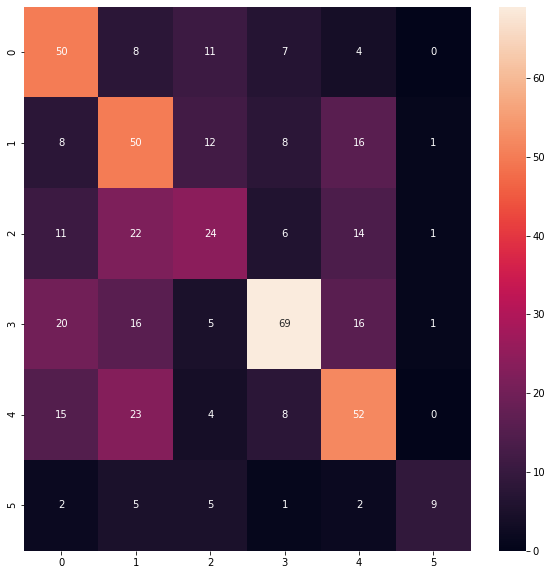

In [66]:
#CONFUSION MATRIX
from sklearn.svm import SVC
import seaborn as sns
y_predict = clf.predict(xtest)
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

print(classification_report(ytest, y_predict))
print("Cross Validation : ",cross_valid)



plt.figure(figsize=(10,10))
cm = confusion_matrix(ytest,y_predict)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
#the above is without hyperparameter

In [179]:
#the below is using the random search 

In [67]:
from sklearn.model_selection import RandomizedSearchCV

In [68]:
from scipy.stats import randint

In [69]:
est = RandomForestClassifier(n_jobs=-1)

In [70]:
rf_p_dist={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
             
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               
              }

In [71]:
def hypertuning_rscv(est, rf_p_distr, nbr_iter,features,labels):
    rdmsearch = RandomizedSearchCV(est, param_distributions=rf_p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(features,labels)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

In [72]:

rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 40, features, labels)

In [73]:
rf_parameters

{'n_estimators': 400,
 'max_depth': None,
 'criterion': 'entropy',
 'bootstrap': False}

In [74]:
rf_ht_score

0.6497839349262837

In [76]:
claasifier=RandomForestClassifier(n_jobs=-1, n_estimators=400,bootstrap= False,criterion='entropy',max_depth=None)

In [77]:
from sklearn.model_selection import cross_val_score


cross_val=cross_val_score(claasifier,features,labels,cv=10,scoring='accuracy').max()

In [78]:
print("Cross Validation : ",cross_val)

Cross Validation :  0.6996047430830039


In [79]:
#almost same

In [75]:
#above one is new


In [139]:
rf_parameters


{'n_estimators': 200,
 'max_depth': None,
 'criterion': 'gini',
 'bootstrap': False}

In [137]:
rf_ht_score

0.6592936225498502

In [180]:
claasifier=RandomForestClassifier(n_jobs=-1, n_estimators=200,bootstrap= False,criterion='gini',max_depth=None)

In [182]:
from sklearn.model_selection import cross_val_score


cross_val=cross_val_score(claasifier,features,labels,cv=10,scoring='accuracy').max()

In [183]:
print("Cross Validation : ",cross_val)

Cross Validation :  0.7063492063492064


In [146]:
rf_ht_score #this is before fitting into the Random forrest classifier

0.6592936225498502

In [184]:
y_pred = classifier.predict(xtest)

              precision    recall  f1-score   support

           0       0.62      0.59      0.61        91
           1       0.44      0.54      0.48       100
           2       0.45      0.38      0.41        81
           3       0.64      0.67      0.66       113
           4       0.58      0.54      0.56        97
           5       0.61      0.46      0.52        24

    accuracy                           0.55       506
   macro avg       0.56      0.53      0.54       506
weighted avg       0.55      0.55      0.55       506

Cross Validation :  0.7063492063492064


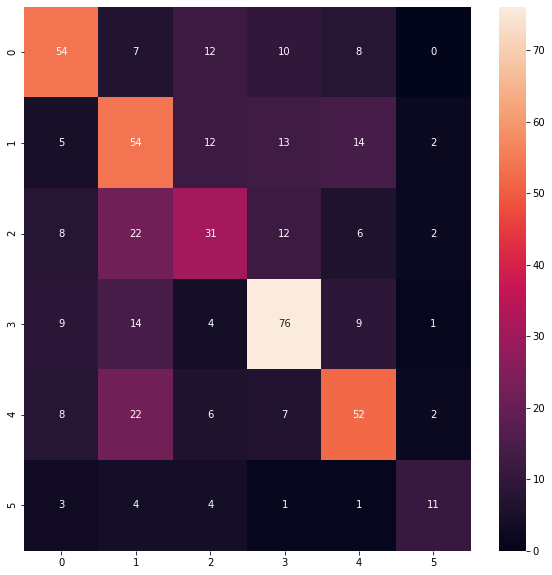

In [185]:
#CONFUSION MATRIX
from sklearn.svm import SVC
import seaborn as sns
y_pred = classifier.predict(xtest)
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

print(classification_report(ytest, y_pred))
print("Cross Validation : ",cross_val)



plt.figure(figsize=(10,10))
cm = confusion_matrix(ytest,y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
#improved the cross validation result afer tuning 

In [206]:
#tried to Visualize the Data with Matplotlib.
#no output cause the dataset is not linearly seperable

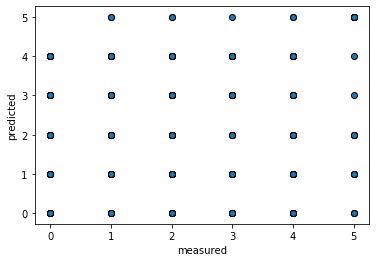

In [205]:
fig,ax=plt.subplots()
ax.scatter(ytest,y_pred, edgecolors=(0,0,0))
ax.plot([labels, labels],[labels, labels],'k--',lw=8)

ax.set_xlabel("measured")
ax.set_ylabel("predicted")
plt.show()

In [45]:
import numpy as np
from datetime import datetime
import time
from sklearn import tree
from sklearn.preprocessing import normalize, scale
from sklearn.metrics import accuracy_score
fmt = '%H:%M:%S'


In [46]:
def get_current_time():
    time.ctime()
    return time.strftime(fmt)

In [67]:
xtrain, xtest, ytrain,ytest = train_test_split (features, labels,  test_size=0.20)

In [48]:
first = get_current_time()

In [62]:
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
classifier.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [63]:
second = get_current_time()
print("Time taken to train(sec):", datetime.strptime(second, fmt) - datetime.strptime(first, fmt))


Time taken to train(sec): 0:01:49


In [64]:
testpredy = classifier.predict(xtest)

In [65]:
third = get_current_time()
print("Time taken to predict(sec):", datetime.strptime(third, fmt) - datetime.strptime(second, fmt))


Time taken to predict(sec): 0:00:04


Accuracy :  0.6185770750988142
Prediction is : plastic


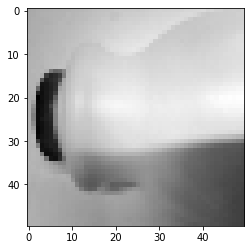

In [84]:
random.shuffle(data)
testpredy= classifier.predict(xtest)
accuracy_score= classifier.score (xtest, ytest)

categories = ['cardboard','glass','metal','paper','plastic','trash']

print('Accuracy : ',accuracy_score)
print('Prediction is :',categories[testpredy[0]])



trash=xtest[0].reshape(50,50)
plt.imshow(trash, cmap='gray')
plt.show()


In [85]:
from sklearn.model_selection import cross_val_score


cross_val=cross_val_score(classifier,features,labels,cv=10,scoring='accuracy').max()

              precision    recall  f1-score   support

           0       0.63      0.82      0.71        76
           1       0.65      0.58      0.61       106
           2       0.54      0.52      0.53        73
           3       0.81      0.72      0.76       128
           4       0.60      0.65      0.62       102
           5       0.58      0.52      0.55        21

    accuracy                           0.65       506
   macro avg       0.63      0.63      0.63       506
weighted avg       0.66      0.65      0.65       506

Cross Validation :  0.5217391304347826


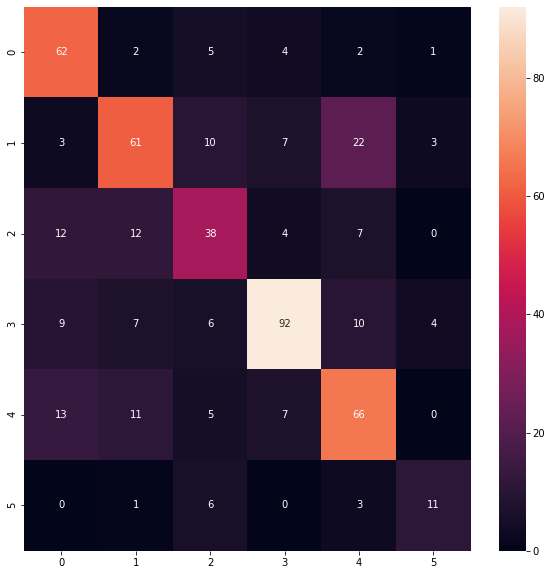

In [69]:

import seaborn as sns
testpredy = classifier.predict(xtest)
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

print(classification_report(ytest, testpredy))
print("Cross Validation : ",cross_val)



plt.figure(figsize=(10,10))
cm = confusion_matrix(ytest,testpredy)
sns.heatmap(cm, annot=True, fmt="d")

In [86]:
import warnings

# Ignoring warnings from external libraries that are irrelevant
warnings.filterwarnings('ignore')

In [87]:
from sklearn.tree import DecisionTreeClassifier

models = {
    'DTC': DecisionTreeClassifier
    
}

In [88]:
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

def scoring_function(model_name, hyperparameter_values):
    # choose the model
    model_class = models[model_name]
    
    # instantiate the model
    model_instance = model_class(**hyperparameter_values)
    
    # perform fit-score
    scores = cross_val_score(
        estimator=model_instance,
        X=dataset.data,
        y=dataset.target,
        scoring=make_scorer(f1_score, average='macro')
    )
    
    return scores.mean()

In [96]:
models = {
    'DTC': DecisionTreeClassifier
}

def scoring_function(model_name, hyperparameter_values):
    model_class = models[model_name]
    model_instance = model_class(**hyperparameter_values)
    scores = cross_val_score(
        estimator=model_instance,
        X=dataset.data,
        y=dataset.target,
        scoring=make_scorer(f1_score, average='macro')
    )
    return scores.mean()

In [97]:
from btb.tuning import Tunable
from btb.tuning import hyperparams as hp

tunables = {
    'DTC': Tunable({
        'max_depth': hp.IntHyperParam(min=3, max=200),
        'min_samples_split': hp.FloatHyperParam(min=0.01, max=1)
    }),
    'SGDC': Tunable({
        'max_iter': hp.IntHyperParam(min=1, max=5000, default=1000),
        'tol': hp.FloatHyperParam(min=1e-3, max=1, default=1e-3),
    })
}

ModuleNotFoundError: No module named 'btb'

In [93]:
pip install baytune

  Using cached pandas-0.25.3-cp37-cp37m-win_amd64.whl (9.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.1
    Uninstalling numpy-1.18.1:
      Successfully uninstalled numpy-1.18.1
Note: you may need to restart the kernel to use updated packages.


ERROR: tensorflow 2.1.0 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.3.3 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\nasik\\anaconda3\\lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [92]:
from btb import BTBSession

session = BTBSession(
    tunables=tunables,
    scorer=scoring_function,
    verbose=True
)

ModuleNotFoundError: No module named 'btb'

In [53]:
pip install tpot

Note: you may need to restart the kernel to use updated packages.


In [49]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(param)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [52]:
from tpot import TPOTClassifier


tpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.ensemble.RandomForestClassifier': param}, 
                                 cv = 4, scoring = 'accuracy')
tpot_classifier.fit(xtrain,ytrain)

AttributeError: 'list' object has no attribute 'shape'

In [57]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(param)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [59]:
pip install TPOT

Note: you may need to restart the kernel to use updated packages.


In [62]:
from tpot import TPOTClassifier


tpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.ensemble.RandomForestClassifier': param}, 
                                 cv = 4, scoring = 'accuracy')
tpot_classifier.fit(features,labels)

AttributeError: 'list' object has no attribute 'shape'

In [60]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(param)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [63]:
from tpot import TPOTClassifier


tpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 config_dict={'sklearn.ensemble.RandomForestClassifier': param}, 
                                 cv = 4, scoring = 'accuracy')
tpot_classifier.fit(features,labels)

AttributeError: 'list' object has no attribute 'shape'

In [71]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [73]:
import sklearn.svm
def objective(trial):

    classifier = trial.suggest_categorical('classifier', ['RandomForest', 'SVC'])
    
    if classifier == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 50, 100,75)
        max_depth = int(trial.suggest_float('max_depth', 10, 50, log=True))

        clf = sklearn.ensemble.RandomForestClassifier(
            n_estimators=n_estimators, max_depth=max_depth)
    else:
        c = trial.suggest_float('svc_c', 1e-10, 1e10, log=True)
        
        clf = sklearn.svm.SVC(C=c, gamma='auto')

    return sklearn.model_selection.cross_val_score(
        clf,xtrain,ytrain, n_jobs=-1, cv=3).mean()

In [74]:
import optuna

optuna.__version__
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2020-08-19 04:15:47,727] Trial 0 finished with value: 0.23750630141254522 and parameters: {'classifier': 'SVC', 'svc_c': 2.263888449938046e-07}. Best is trial 0 with value: 0.23750630141254522.
C:\Users\Nasik\Anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: The distribution is specified by [50, 100] and step=75, but the range is not divisible by `step`. It will be replaced by [50, 50].
  low=low, old_high=old_high, high=high, step=step
[I 2020-08-19 04:15:51,446] Trial 1 finished with value: 0.595751341484385 and parameters: {'classifier': 'RandomForest', 'n_estimators': 50, 'max_depth': 34.63725706170689}. Best is trial 1 with value: 0.595751341484385.
[I 2020-08-19 04:16:11,939] Trial 2 finished with value: 0.23750630141254522 and parameters: {'classifier': 'SVC', 'svc_c': 3647983.90090978}. Best is trial 1 with value: 0.595751341484385.
[I 2020-08-19 04:16:34,361] Trial 3 finished with value: 0.23750630141254522 and parameters: {'classifier': 'SVC', 'svc_c': 

Accuracy: 0.6011812117230524
Best hyperparameters: {'classifier': 'RandomForest', 'n_estimators': 50, 'max_depth': 12.47204134428105}


In [75]:

trial

FrozenTrial(number=5, value=0.6011812117230524, datetime_start=datetime.datetime(2020, 8, 19, 4, 16, 55, 99202), datetime_complete=datetime.datetime(2020, 8, 19, 4, 16, 58, 279150), params={'classifier': 'RandomForest', 'n_estimators': 50, 'max_depth': 12.47204134428105}, distributions={'classifier': CategoricalDistribution(choices=('RandomForest', 'SVC')), 'n_estimators': IntUniformDistribution(high=50, low=50, step=75), 'max_depth': LogUniformDistribution(high=50, low=10)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=5, state=TrialState.COMPLETE)

In [76]:
study.best_params

{'classifier': 'RandomForest',
 'n_estimators': 50,
 'max_depth': 12.47204134428105}

In [79]:

rf=RandomForestClassifier(n_estimators=50,max_depth=12.47204134428105)
rf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12.47204134428105,
                       max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [82]:
y_pred=rf.predict(xtest)
print(confusion_matrix(ytest,y_pred))
print(accuracy_score(ytest,y_pred))
print(classification_report(ytest,y_pred))

[[55  5  3  9  5  0]
 [ 5 63 12 13 23  3]
 [ 8 21 38  4 18  0]
 [ 9  6  5 85  9  0]
 [ 6 10  5  8 48  0]
 [ 3  7  4  2  2 12]]


NameError: name 'accuracy_score' is not defined

In [84]:
print(confusion_matrix(ytest,y_pred))
print(classification_report(ytest,y_pred))

[[55  5  3  9  5  0]
 [ 5 63 12 13 23  3]
 [ 8 21 38  4 18  0]
 [ 9  6  5 85  9  0]
 [ 6 10  5  8 48  0]
 [ 3  7  4  2  2 12]]
              precision    recall  f1-score   support

           0       0.64      0.71      0.67        77
           1       0.56      0.53      0.55       119
           2       0.57      0.43      0.49        89
           3       0.70      0.75      0.72       114
           4       0.46      0.62      0.53        77
           5       0.80      0.40      0.53        30

    accuracy                           0.59       506
   macro avg       0.62      0.57      0.58       506
weighted avg       0.60      0.59      0.59       506



In [86]:
pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=8818b04421041f393e5e9ab0171a182faf4f961c0c3063b875ee6ad9377d14dd
  Stored in directory: c:\users\nasik\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


ImportError: Tried to import 'plotly' but failed. Please make sure that the package is installed correctly to use this feature. Actual error: No module named 'plotly'.

In [90]:
pip install plotly==3.10.0

Note: you may need to restart the kernel to use updated packages.


In [100]:

import plotly.plotly as py
import plotly.graph_objs as go


optuna.visualization.plot_optimization_history(study)

ImportError: Tried to import 'plotly' but failed. Please make sure that the package is installed correctly to use this feature. Actual error: No module named 'plotly'.

In [93]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [95]:
from chart_studio.plotply import iplot

ModuleNotFoundError: No module named 'chart_studio.plotply'

In [96]:
pip uninstall cufflinks pip install plotly == 3.10.0

ERROR: Invalid requirement: '=='


Note: you may need to restart the kernel to use updated packages.


In [99]:
optuna.visualization.plot_contour(study, params=['n_estimators', 'max_depth'])


ImportError: Tried to import 'plotly' but failed. Please make sure that the package is installed correctly to use this feature. Actual error: No module named 'plotly'.